In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo Random Forest con los mejores parámetros encontrados
rf_model = RandomForestRegressor(bootstrap=True, max_depth=20, max_features='sqrt', 
                                 min_samples_leaf=4, min_samples_split=10, n_estimators=100, 
                                 random_state=42)

# Entrenar el modelo
rf_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = rf_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores de prueba
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df_result = pd.DataFrame({'real': y_test_real.flatten(), 'pred': y_pred_real.flatten()}, index=data_brent.index[-len(y_test_real):])

# Gráfico de comparación utilizando Plotly
fig = go.Figure()

# Añadir las series reales y predichas al gráfico
fig.add_trace(go.Scatter(x=df_result.index, y=df_result['real'], mode='lines', name='Precio Real'))
fig.add_trace(go.Scatter(x=df_result.index, y=df_result['pred'], mode='lines', name='Predicciones Random Forest'))

# Configurar el título y los ejes
fig.update_layout(
    title='Comparación de Precios Reales vs Predicciones con Random Forest',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre (USD)',
    legend=dict(x=0, y=1),
    hovermode='x unified',
    template='plotly_white'
)

# Mostrar la gráfica
fig.show()


In [1]:
data_brent['Date'] = pd.to_datetime(data_brent['Date'], errors='coerce', utc=True)


# Importamos el módulo sys para acceder a información sobre el sistema
import sys

# Imprimimos la versión de Python
print("Versión de Python:", sys.version)

Versión de Python: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


In [1]:
#prediccccion diaria

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo Random Forest con los mejores parámetros encontrados
rf_model = RandomForestRegressor(bootstrap=True, max_depth=20, max_features='sqrt', 
                                 min_samples_leaf=4, min_samples_split=10, n_estimators=100, 
                                 random_state=42)

# Entrenar el modelo
rf_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = rf_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


MAE: 0.018865573701435264
MSE: 0.0006814622189725003
RMSE: 0.0261048313339217
R^2: 0.9389932468664858


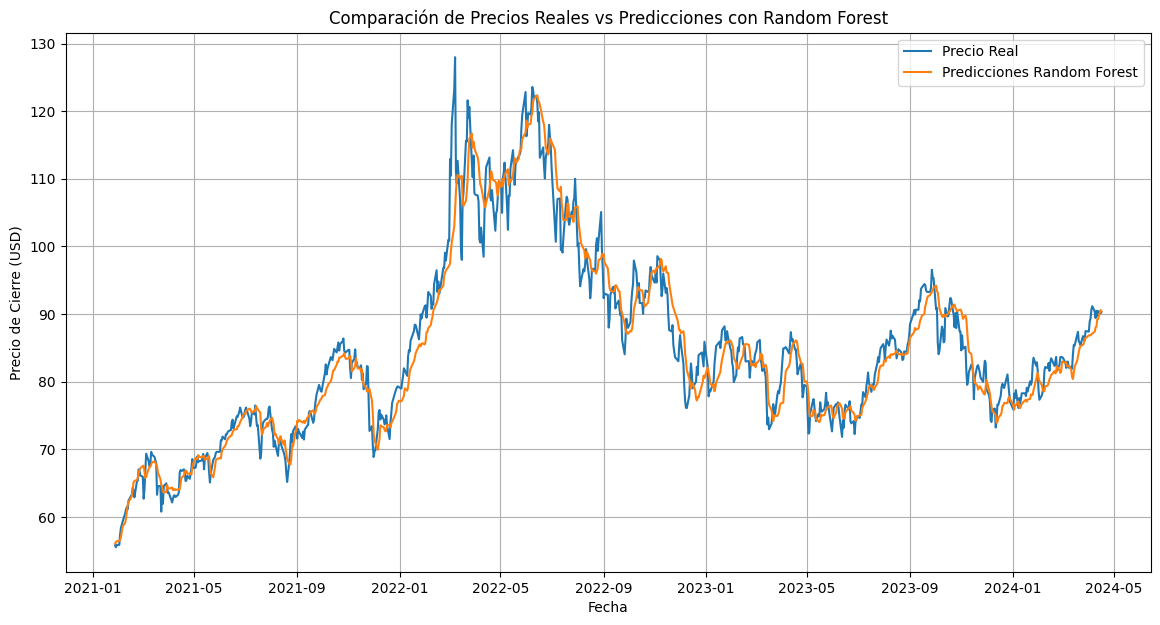

In [2]:
# Desnormalizar las predicciones y los valores de prueba
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df_result = pd.DataFrame({'real': y_test_real.flatten(), 'pred': y_pred_real.flatten()}, index=data_brent.index[-len(y_test_real):])

# Gráfico de comparación
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(y_pred):], y_test_real, label='Precio Real')
plt.plot(data_brent.index[-len(y_pred):], y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

MAE: 0.018865573701435264
MSE: 0.0006814622189725003
RMSE: 0.0261048313339217
R^2: 0.9389932468664858


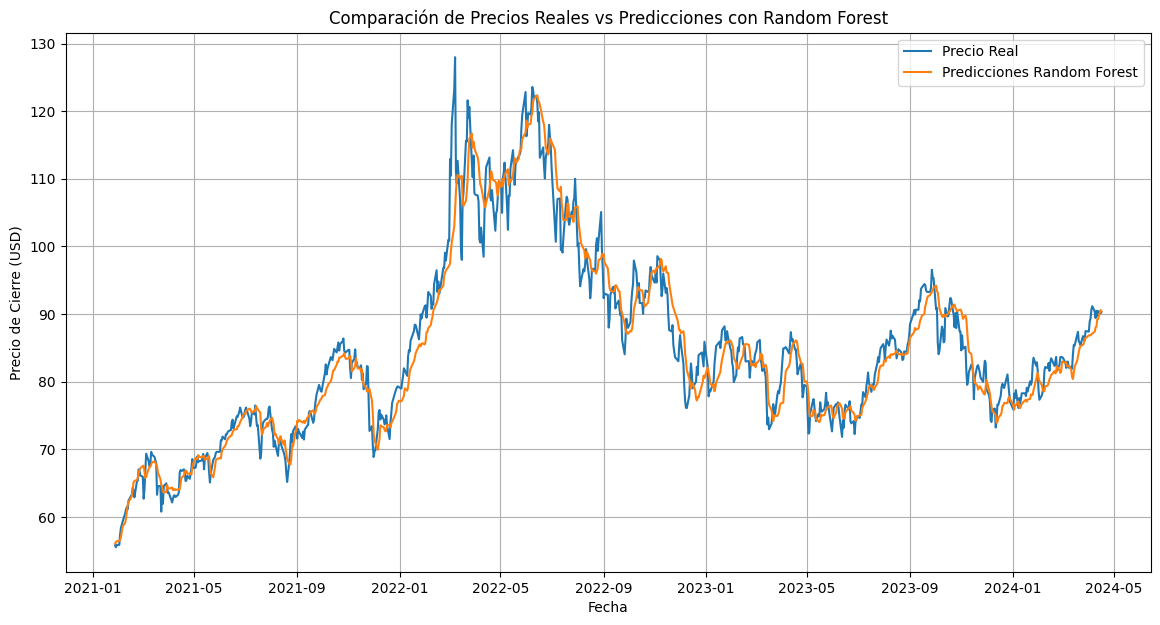

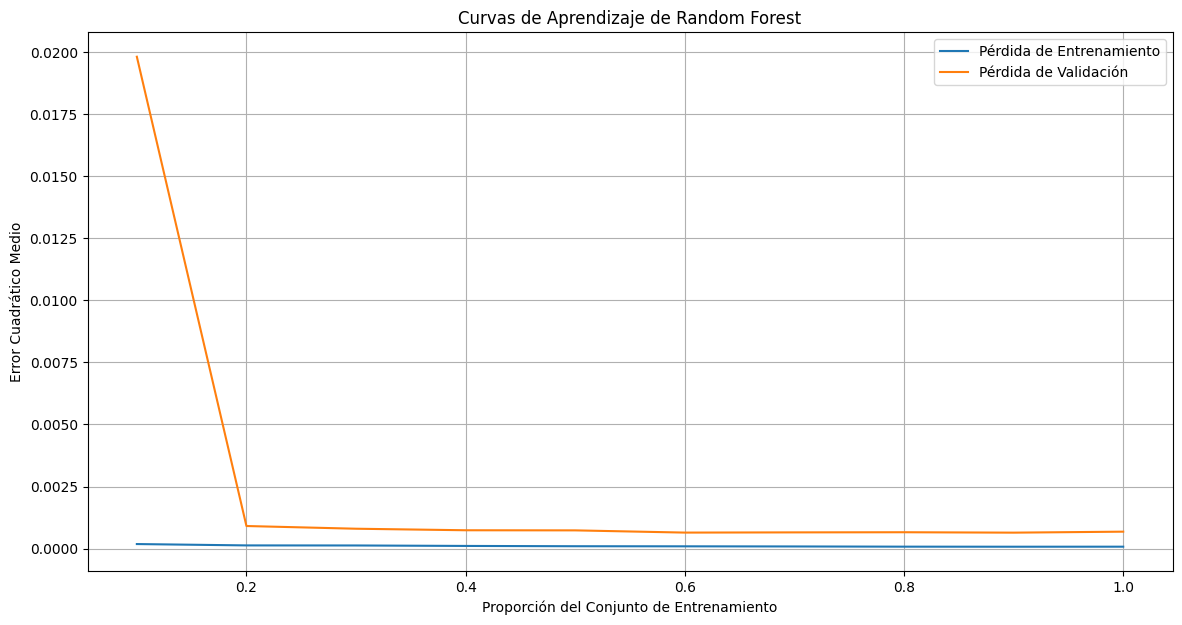

Errores CV (MSE) para cada partición: [0.00096606 0.00261397 0.00038456 0.00062294 0.00078127]
Error CV (MSE) promedio: 0.001073759471312183
Error CV (MSE) std: -0.0007934268160005713


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo Random Forest con los mejores parámetros encontrados
rf_model = RandomForestRegressor(bootstrap=True, max_depth=20, max_features='sqrt', 
                                 min_samples_leaf=4, min_samples_split=10, n_estimators=100, 
                                 random_state=42)

# Entrenar el modelo
rf_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = rf_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Gráfico de comparación
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(y_pred):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Precio Real')
plt.plot(data_brent.index[-len(y_pred):], scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Curvas de Aprendizaje
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
val_scores = []

for train_size in train_sizes:
    x_train_size = x_train[:int(len(x_train) * train_size)]
    y_train_size = y_train[:int(len(y_train) * train_size)]
    rf_model.fit(x_train_size, y_train_size)
    y_train_pred = rf_model.predict(x_train_size)
    y_val_pred = rf_model.predict(x_test)
    train_scores.append(mean_squared_error(y_train_size, y_train_pred))
    val_scores.append(mean_squared_error(y_test, y_val_pred))

plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_scores, label='Pérdida de Entrenamiento')
plt.plot(train_sizes, val_scores, label='Pérdida de Validación')
plt.title('Curvas de Aprendizaje de Random Forest')
plt.xlabel('Proporción del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.grid(True)
plt.show()

# Validación Cruzada con Series Temporales
tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(rf_model, x, y, cv=tscv, scoring='neg_mean_squared_error')
print("Errores CV (MSE) para cada partición:", -cv_scores)
print("Error CV (MSE) promedio:", -cv_scores.mean())
print("Error CV (MSE) std:", -cv_scores.std())


In [3]:
#validacion cruzada para mirar el sobreajuste, tendria que mirarlo con ello o utilizo otra tecnica para mirar el sobreajuste?? para ponerlo 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# Configuración del modelo con los mejores parámetros encontrados
best_params = {
    'n_estimators': 250,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 20,
    'bootstrap': False
}

# Instanciar el modelo Random Forest
rf_model = RandomForestRegressor(**best_params)

# Configuración de K-Fold para la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular las métricas usando validación cruzada
mae_scores = cross_val_score(rf_model, x, y, scoring='neg_mean_absolute_error', cv=kf)
mse_scores = cross_val_score(rf_model, x, y, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(rf_model, x, y, scoring='r2', cv=kf)

# Convertir las métricas a valores positivos
mae_scores = -mae_scores
mse_scores = -mse_scores

# Calcular RMSE a partir de los MSE
rmse_scores = np.sqrt(mse_scores)

# Imprimir los resultados
print(f"Validación Cruzada - MAE: {mae_scores}")
print(f"Validación Cruzada - MAE promedio: {mae_scores.mean()}")
print(f"Validación Cruzada - MSE: {mse_scores}")
print(f"Validación Cruzada - MSE promedio: {mse_scores.mean()}")
print(f"Validación Cruzada - RMSE: {rmse_scores}")
print(f"Validación Cruzada - RMSE promedio: {rmse_scores.mean()}")
print(f"Validación Cruzada - R^2: {r2_scores}")
print(f"Validación Cruzada - R^2 promedio: {r2_scores.mean()}")


Validación Cruzada - MAE: [0.00987304 0.00939531 0.00948423 0.00962524 0.00967632]
Validación Cruzada - MAE promedio: 0.009610827586554693
Validación Cruzada - MSE: [0.00018448 0.00017643 0.00017826 0.00018178 0.00018819]
Validación Cruzada - MSE promedio: 0.00018182894850376352
Validación Cruzada - RMSE: [0.01358248 0.01328286 0.01335134 0.01348269 0.01371808]
Validación Cruzada - RMSE promedio: 0.013483487643977738
Validación Cruzada - R^2: [0.99563476 0.99530835 0.99558164 0.99547057 0.994874  ]
Validación Cruzada - R^2 promedio: 0.9953738648636221


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 17.366469021141906
Error Absoluto Medio (MAE) de Random Forest: 3.10435114314515
Raíz del Error Cuadrático Medio (RMSE) de 

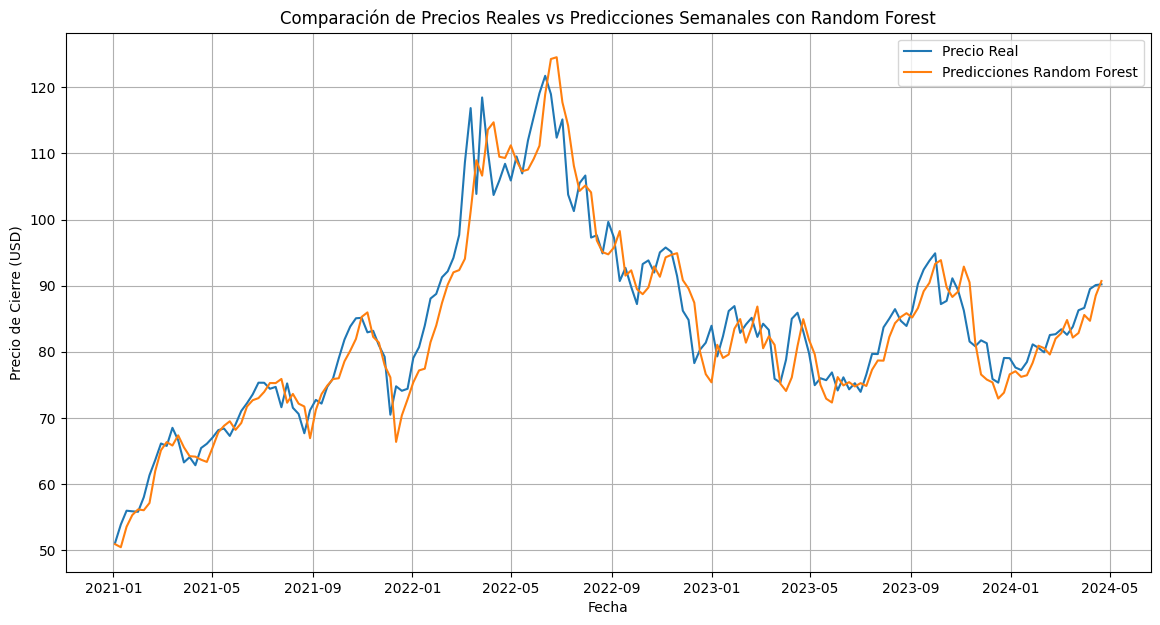

Fechas de prueba: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24 00:00:00+00:00',
               '2021-01-31 00:00:00+00:00', '2021-02-07 00:00:00+00:00',
               '2021-02-14 00:00:00+00:00', '2021-02-21 00:00:00+00:00',
               '2021-02-28 00:00:00+00:00', '2021-03-07 00:00:00+00:00',
               ...
               '2024-02-18 00:00:00+00:00', '2024-02-25 00:00:00+00:00',
               '2024-03-03 00:00:00+00:00', '2024-03-10 00:00:00+00:00',
               '2024-03-17 00:00:00+00:00', '2024-03-24 00:00:00+00:00',
               '2024-03-31 00:00:00+00:00', '2024-04-07 00:00:00+00:00',
               '2024-04-14 00:00:00+00:00', '2024-04-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=173, freq='W-SUN')
Fechas de predicción: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24

In [11]:
#semanal 

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 10  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[-len(y_pred):]
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Comprobación de alineación
print(f"Fechas de prueba: {data_brent_weekly.index[-len(y_test_real):]}")
print(f"Fechas de predicción: {data_brent_weekly.index[-len(y_pred_real):]}")





DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 18.39545475774442
Error Absoluto Medio (MAE) de Random Forest: 3.2602524663086774
Raíz del Error Cuadrático Medio (RMSE) de

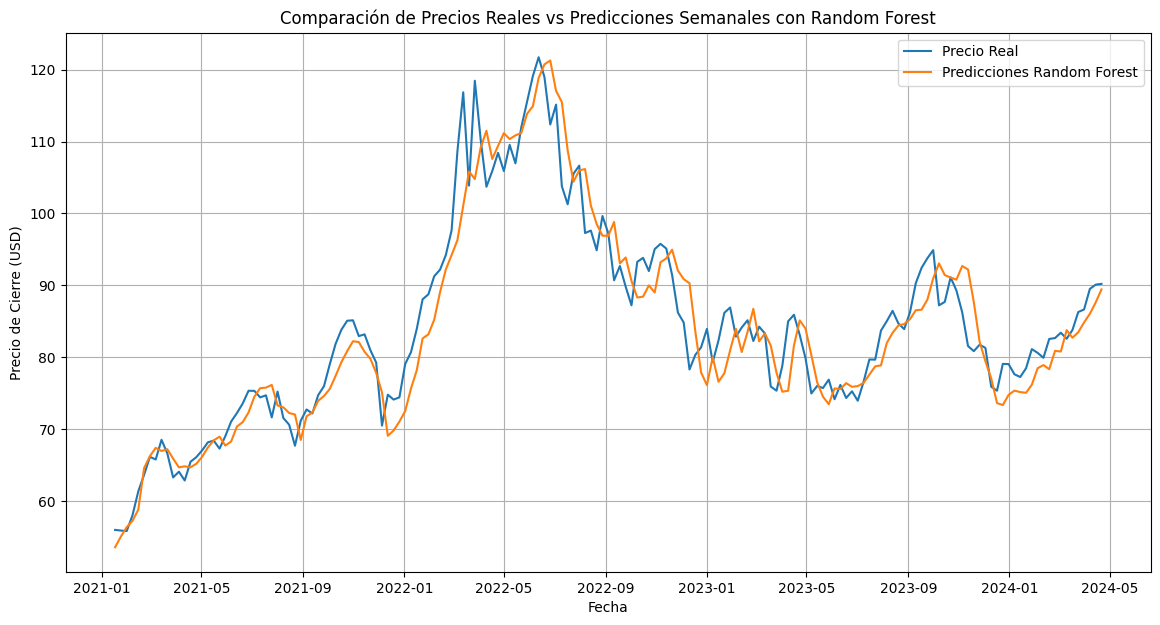

In [1]:
#semanal 

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[-len(y_pred):]
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 17.366469021141906
Error Absoluto Medio (MAE) de Random Forest: 3.10435114314515
Raíz del Error Cuadrático Medio (RMSE) de 

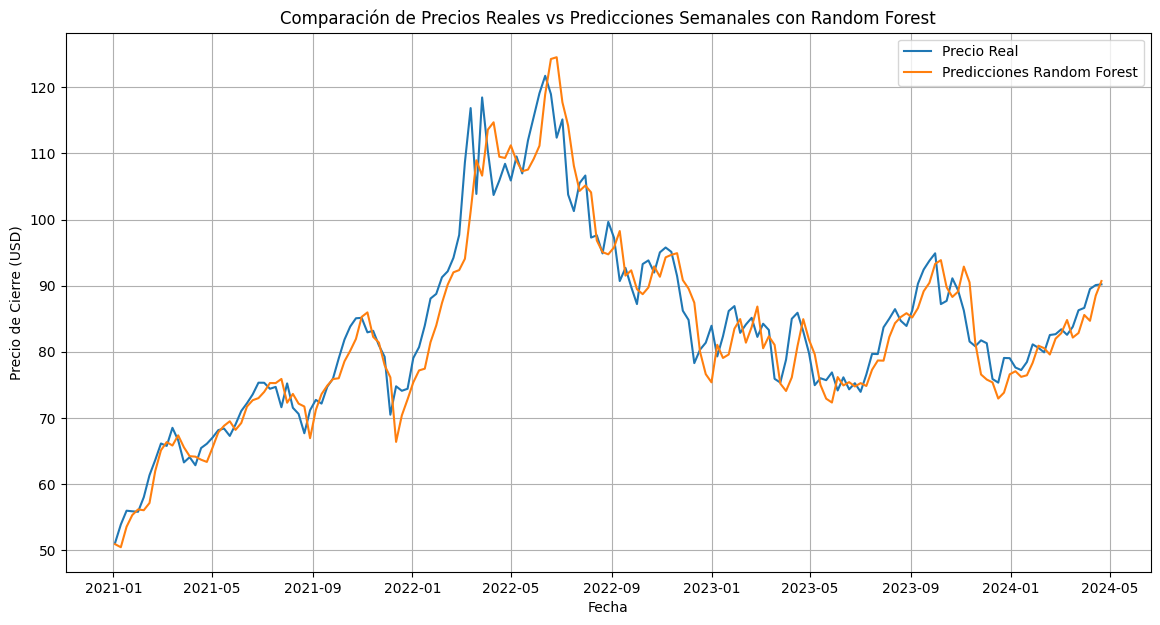

Fechas de prueba: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24 00:00:00+00:00',
               '2021-01-31 00:00:00+00:00', '2021-02-07 00:00:00+00:00',
               '2021-02-14 00:00:00+00:00', '2021-02-21 00:00:00+00:00',
               '2021-02-28 00:00:00+00:00', '2021-03-07 00:00:00+00:00',
               ...
               '2024-02-18 00:00:00+00:00', '2024-02-25 00:00:00+00:00',
               '2024-03-03 00:00:00+00:00', '2024-03-10 00:00:00+00:00',
               '2024-03-17 00:00:00+00:00', '2024-03-24 00:00:00+00:00',
               '2024-03-31 00:00:00+00:00', '2024-04-07 00:00:00+00:00',
               '2024-04-14 00:00:00+00:00', '2024-04-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=173, freq='W-SUN')
Fechas de predicción: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 10  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[seq_length + len(x_train):]  # Alinear correctamente con las fechas de prueba
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Comprobación de alineación
print(f"Fechas de prueba: {data_brent_weekly.index[seq_length + len(x_train):]}")
print(f"Fechas de predicción: {data_brent_weekly.index[seq_length + len(x_train):]}")




DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 17.366469021141906
Error Absoluto Medio (MAE) de Random Forest: 3.10435114314515
Raíz del Error Cuadrático Medio (RMSE) de 

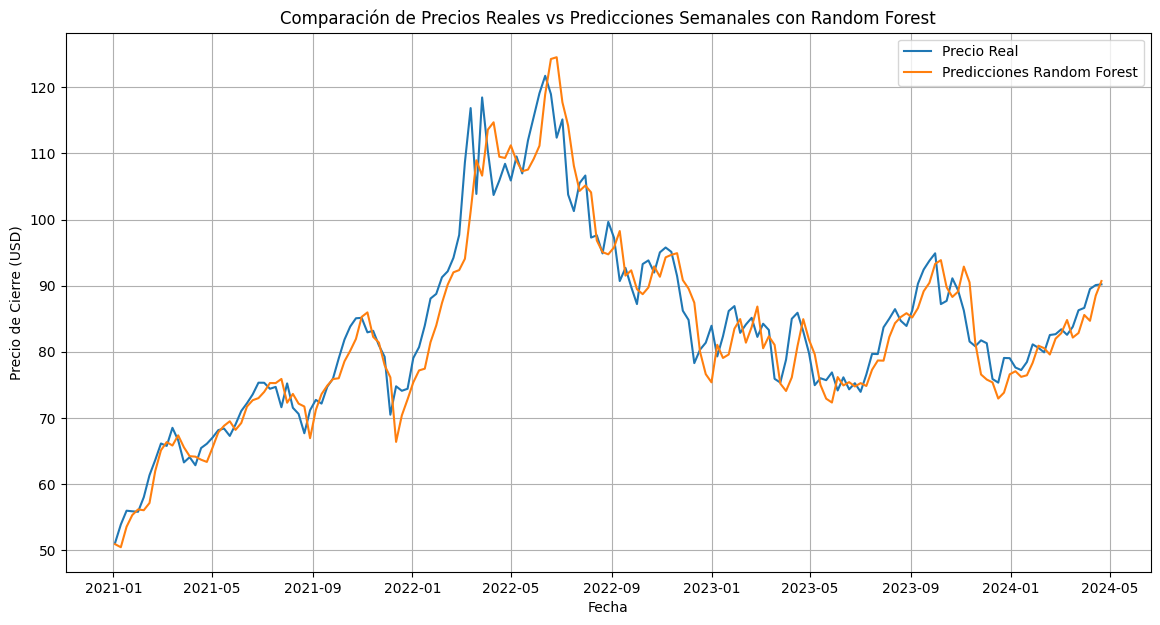

Fechas de prueba: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24 00:00:00+00:00',
               '2021-01-31 00:00:00+00:00', '2021-02-07 00:00:00+00:00',
               '2021-02-14 00:00:00+00:00', '2021-02-21 00:00:00+00:00',
               '2021-02-28 00:00:00+00:00', '2021-03-07 00:00:00+00:00',
               ...
               '2024-02-18 00:00:00+00:00', '2024-02-25 00:00:00+00:00',
               '2024-03-03 00:00:00+00:00', '2024-03-10 00:00:00+00:00',
               '2024-03-17 00:00:00+00:00', '2024-03-24 00:00:00+00:00',
               '2024-03-31 00:00:00+00:00', '2024-04-07 00:00:00+00:00',
               '2024-04-14 00:00:00+00:00', '2024-04-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=173, freq='W-SUN')
Fechas de predicción: DatetimeIndex(['2021-01-03 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-24

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 10  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[-len(y_pred):]
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Comprobación de alineación
print(f"Fechas de prueba: {data_brent_weekly.index[seq_length + len(x_train):]}")
print(f"Fechas de predicción: {data_brent_weekly.index[seq_length + len(x_train):]}")


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 13.432800919739092
Error Absoluto Medio (MAE) de Random Forest: 2.7888916233818883
Raíz del Error Cuadrático Medio (RMSE) d

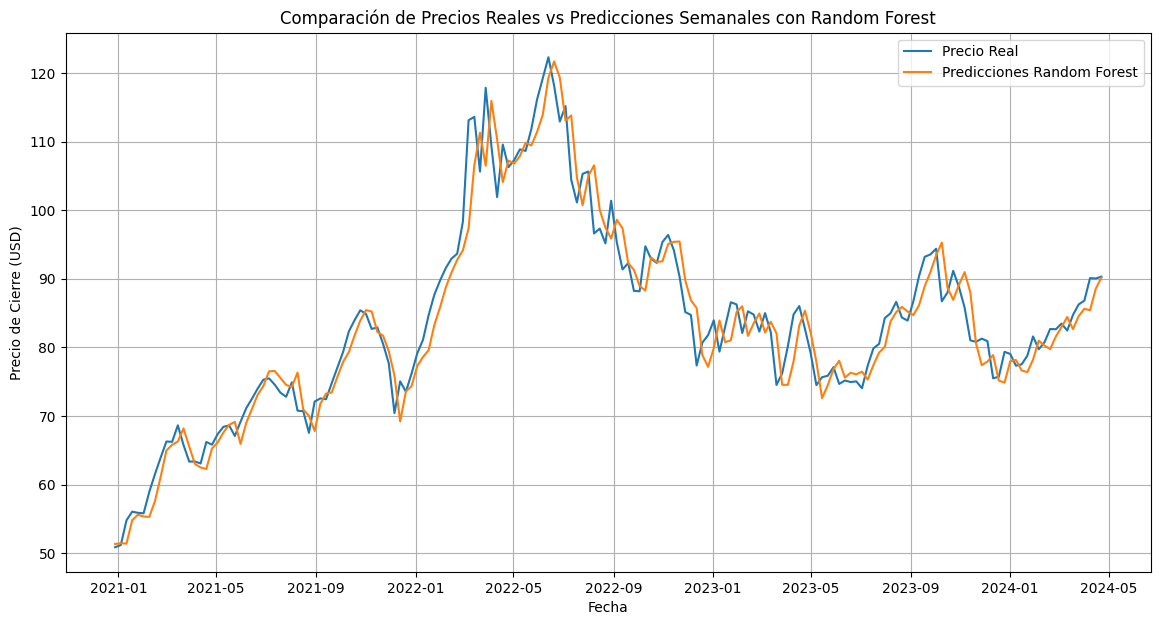

Fechas de prueba: DatetimeIndex(['2020-12-28 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-11 00:00:00+00:00', '2021-01-18 00:00:00+00:00',
               '2021-01-25 00:00:00+00:00', '2021-02-01 00:00:00+00:00',
               '2021-02-08 00:00:00+00:00', '2021-02-15 00:00:00+00:00',
               '2021-02-22 00:00:00+00:00', '2021-03-01 00:00:00+00:00',
               ...
               '2024-02-19 00:00:00+00:00', '2024-02-26 00:00:00+00:00',
               '2024-03-04 00:00:00+00:00', '2024-03-11 00:00:00+00:00',
               '2024-03-18 00:00:00+00:00', '2024-03-25 00:00:00+00:00',
               '2024-04-01 00:00:00+00:00', '2024-04-08 00:00:00+00:00',
               '2024-04-15 00:00:00+00:00', '2024-04-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=174, freq='W-MON')
Fechas de predicción: DatetimeIndex(['2020-12-28 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-11 00:00:00+00:00', '2021-01-18

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de los lunes
data_brent_weekly = data_brent['Close'].resample('W-MON').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 4  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='sqrt', 
                                 min_samples_leaf=4, min_samples_split=10, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[seq_length + len(x_train): seq_length + len(x_train) + len(y_pred)]
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Comprobación de alineación
print(f"Fechas de prueba: {data_brent_weekly.index[seq_length + len(x_train):seq_length + len(x_train) + len(y_test)]}")
print(f"Fechas de predicción: {pred_index}")



DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 13.005832178807054
Error Absoluto Medio (MAE) de Random Forest: 2.7396621245154895
Raíz del Error Cuadrático Medio (RMSE) d

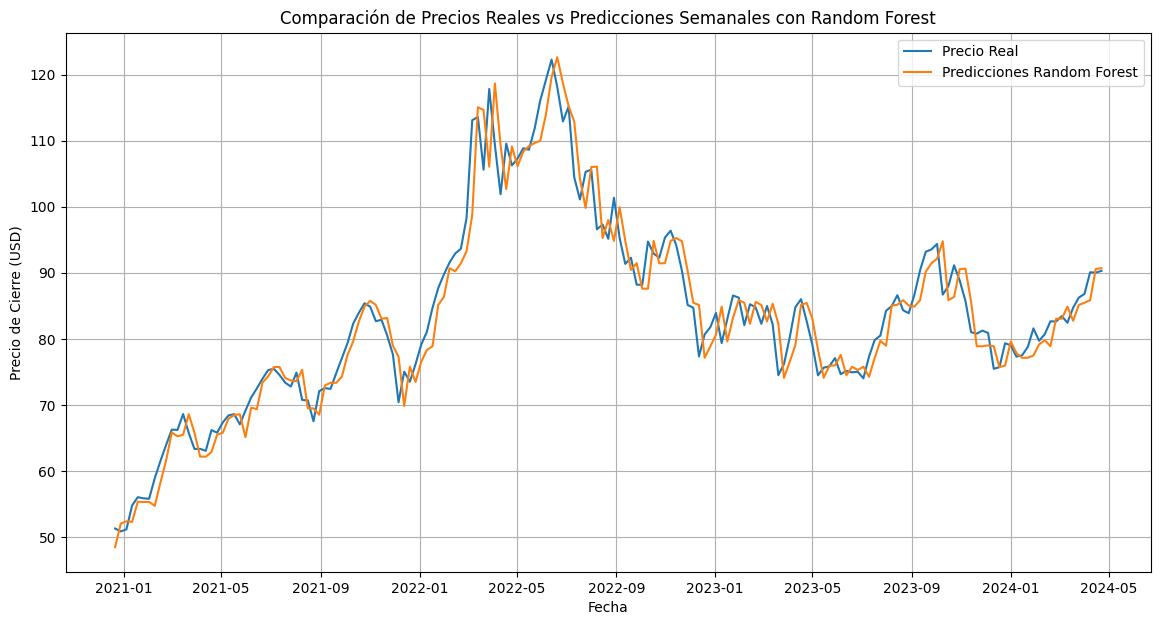

Fechas de prueba: DatetimeIndex(['2020-12-21 00:00:00+00:00', '2020-12-28 00:00:00+00:00',
               '2021-01-04 00:00:00+00:00', '2021-01-11 00:00:00+00:00',
               '2021-01-18 00:00:00+00:00', '2021-01-25 00:00:00+00:00',
               '2021-02-01 00:00:00+00:00', '2021-02-08 00:00:00+00:00',
               '2021-02-15 00:00:00+00:00', '2021-02-22 00:00:00+00:00',
               ...
               '2024-02-19 00:00:00+00:00', '2024-02-26 00:00:00+00:00',
               '2024-03-04 00:00:00+00:00', '2024-03-11 00:00:00+00:00',
               '2024-03-18 00:00:00+00:00', '2024-03-25 00:00:00+00:00',
               '2024-04-01 00:00:00+00:00', '2024-04-08 00:00:00+00:00',
               '2024-04-15 00:00:00+00:00', '2024-04-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=175, freq='W-MON')
Fechas de predicción: DatetimeIndex(['2020-12-21 00:00:00+00:00', '2020-12-28 00:00:00+00:00',
               '2021-01-04 00:00:00+00:00', '2021-01-11

In [36]:
#semanal

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de los lunes
data_brent_weekly = data_brent['Close'].resample('W-MON').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length =1  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor( max_features='log2', 
                                 min_samples_leaf=5, min_samples_split=5, n_estimators=50, 
                                 random_state=10)
model_rf.fit(x_train, y_train)

# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
# Alinear correctamente los índices de las predicciones con los datos reales
pred_index = data_brent_weekly.index[-len(y_pred_real):]  # Alinear el índice de predicción con los valores de prueba
plt.plot(pred_index, y_test_real, label='Precio Real')
plt.plot(pred_index, y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Comprobación de alineación
print(f"Fechas de prueba: {data_brent_weekly.index[seq_length + len(x_train):seq_length + len(x_train) + len(y_test)]}")
print(f"Fechas de predicción: {pred_index}")



DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 17.366469021141906
Error Absoluto Medio (MAE) de Random Forest: 3.10435114314515
Raíz del Error Cuadrático Medio (RMSE) de 

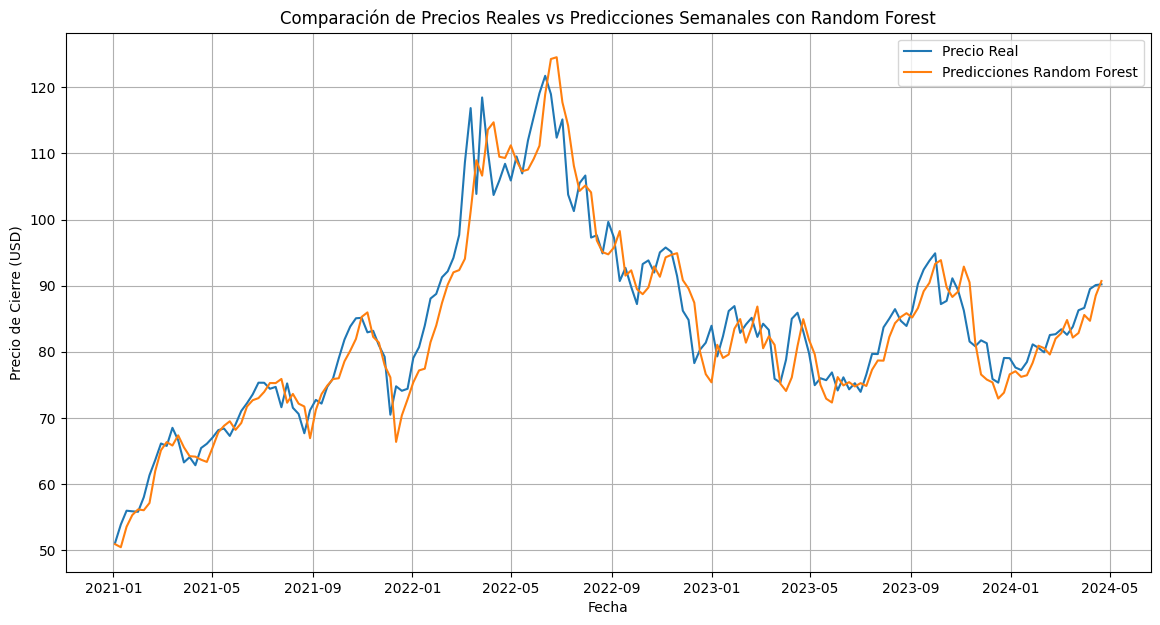

In [9]:
#prediccion semanal
# en la prediccion semanal obtengo mejor resultado del mse, si cambio los hiperparametros.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))


# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 10  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)


# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

#Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
plt.plot(data_brent_weekly.index[-len(y_pred):], y_test_real, label='Precio Real')
plt.plot(data_brent_weekly.index[-len(y_pred):], y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()



DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Error Cuadrático Medio (MSE) de Random Forest: 18.39545475774442
Error Absoluto Medio (MAE) de Random Forest: 3.2602524663086774
Raíz del Error Cuadrático Medio (RMSE) de

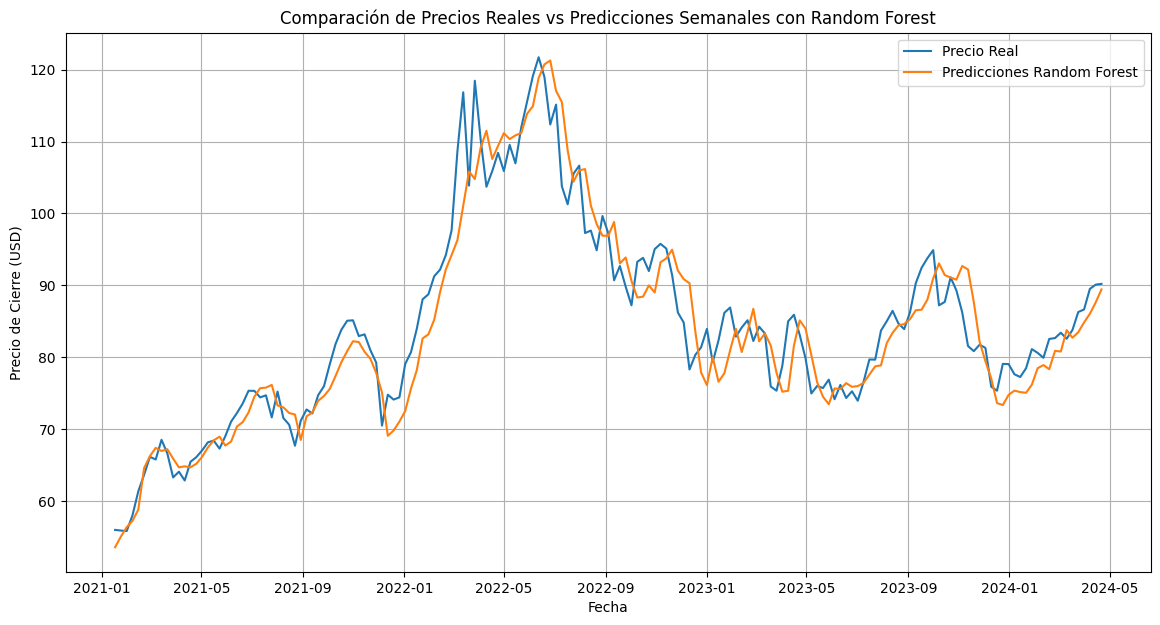

In [4]:
#prediccion semanal
# en la prediccion semanal obtengo mejor resultado del mse, si cambio los hiperparametros.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)


# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Modelo Random Forest
# Instanciar el modelo Random Forest con los mejores parámetros encontrados
model_rf = RandomForestRegressor(bootstrap=False, max_depth=None, max_features='log2', 
                                 min_samples_leaf=2, min_samples_split=2, n_estimators=200, 
                                 random_state=42)
model_rf.fit(x_train, y_train)

#Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
# Predicciones y evaluación
y_pred = model_rf.predict(x_test)
# Des-normalizar las predicciones y los valores reales para el cálculo de las métricas
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Calcular las métricas
mse_rf = mean_squared_error(y_test_real, y_pred_real)
mae_rf = mean_absolute_error(y_test_real, y_pred_real)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_real, y_pred_real)

print("Error Cuadrático Medio (MSE) de Random Forest:", mse_rf)
print("Error Absoluto Medio (MAE) de Random Forest:", mae_rf)
print("Raíz del Error Cuadrático Medio (RMSE) de Random Forest:", rmse_rf)
print("Coeficiente de Determinación (R^2) de Random Forest:", r2_rf)

# Gráfico de comparación
plt.figure(figsize=(14, 7))
plt.plot(data_brent_weekly.index[-len(y_pred):], y_test_real, label='Precio Real')
plt.plot(data_brent_weekly.index[-len(y_pred):], y_pred_real, label='Predicciones Random Forest')
plt.title('Comparación de Precios Reales vs Predicciones Semanales con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()



MAE: 0.019501060114936335
MSE: 0.0006973592803478244
RMSE: 0.026407561045045876
R^2: 0.9375700893210315


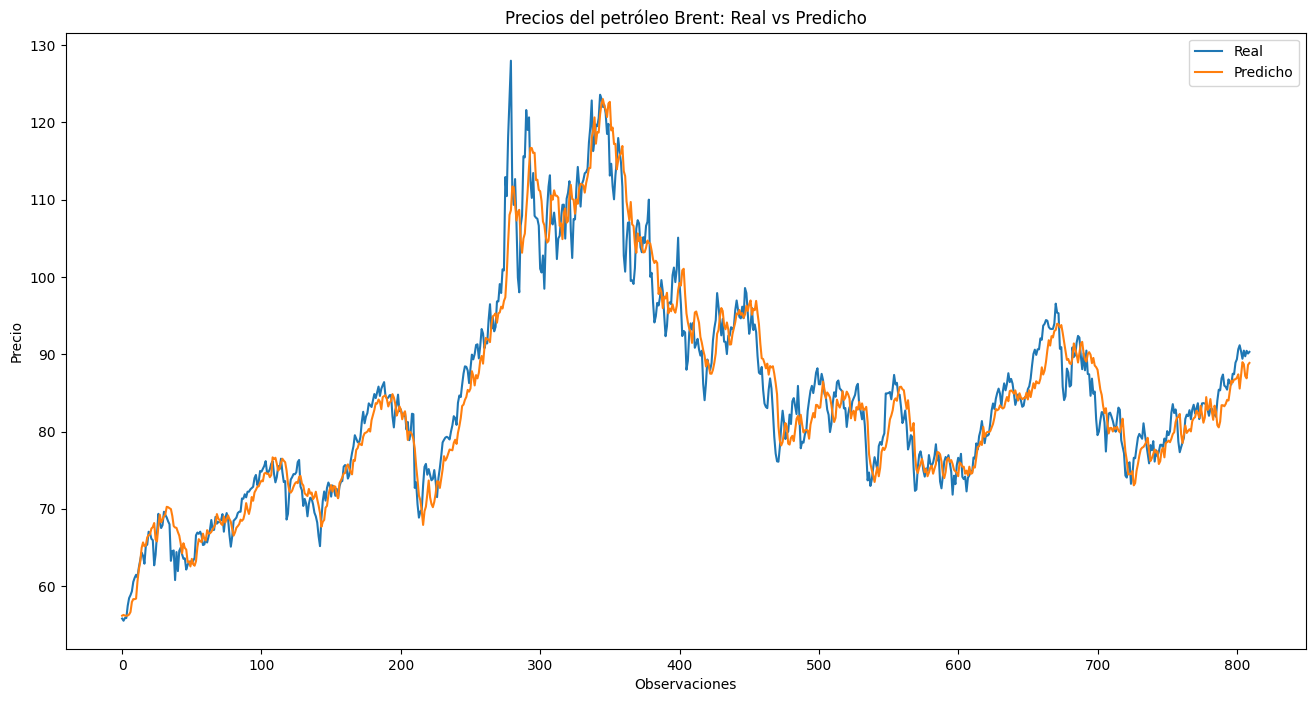

In [1]:
#prediccion diaria , GBM regresion

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Gradient Boosting Machine
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo Gradient Boosting Machine con parámetros 
gbm_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=10, 
                                      min_samples_leaf=4, max_features='sqrt', 
                                      learning_rate=0.1, random_state=42)

# Entrenar el modelo
gbm_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = gbm_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para Gradient Boosting Machine
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# Instanciar el modelo Gradient Boosting Machine con parámetros tentativos
gbm_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=10, 
                                      min_samples_leaf=4, max_features='sqrt', 
                                      learning_rate=0.1, random_state=42)

# Realizar validación cruzada
scores = cross_validate(gbm_model, x, y, cv=5, 
                        scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'),
                        return_train_score=False)

# Convertir a positivo (porque 'neg_mean_absolute_error' y 'neg_mean_squared_error' devuelven valores negativos)
mae_scores = -scores['test_neg_mean_absolute_error']
mse_scores = -scores['test_neg_mean_squared_error']
rmse_scores = np.sqrt(mse_scores)
r2_scores = scores['test_r2']

print(f"Validación Cruzada - MAE: {mae_scores}")
print(f"Validación Cruzada - MAE promedio: {mae_scores.mean()}")
print(f"Validación Cruzada - MSE: {mse_scores}")
print(f"Validación Cruzada - MSE promedio: {mse_scores.mean()}")
print(f"Validación Cruzada - RMSE: {rmse_scores}")
print(f"Validación Cruzada - RMSE promedio: {rmse_scores.mean()}")
print(f"Validación Cruzada - R^2: {r2_scores}")
print(f"Validación Cruzada - R^2 promedio: {r2_scores.mean()}")

Validación Cruzada - MAE: [0.02380543 0.0362606  0.01645676 0.01661015 0.01937286]
Validación Cruzada - MAE promedio: 0.02250116077039128
Validación Cruzada - MSE: [0.00131102 0.00180535 0.00042119 0.000625   0.00069397]
Validación Cruzada - MSE promedio: 0.0009713047472112944
Validación Cruzada - RMSE: [0.03620799 0.04248939 0.02052291 0.02499993 0.02634332]
Validación Cruzada - RMSE promedio: 0.03011270803481874
Validación Cruzada - R^2: [0.96127746 0.14397161 0.96639276 0.94767284 0.93759562]
Validación Cruzada - R^2 promedio: 0.7913820576875668


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
MAE: 0.027317365835745084
MSE: 0.0013455592954245707
RMSE: 0.0366818660297506
R^2: 0.8929933314956844


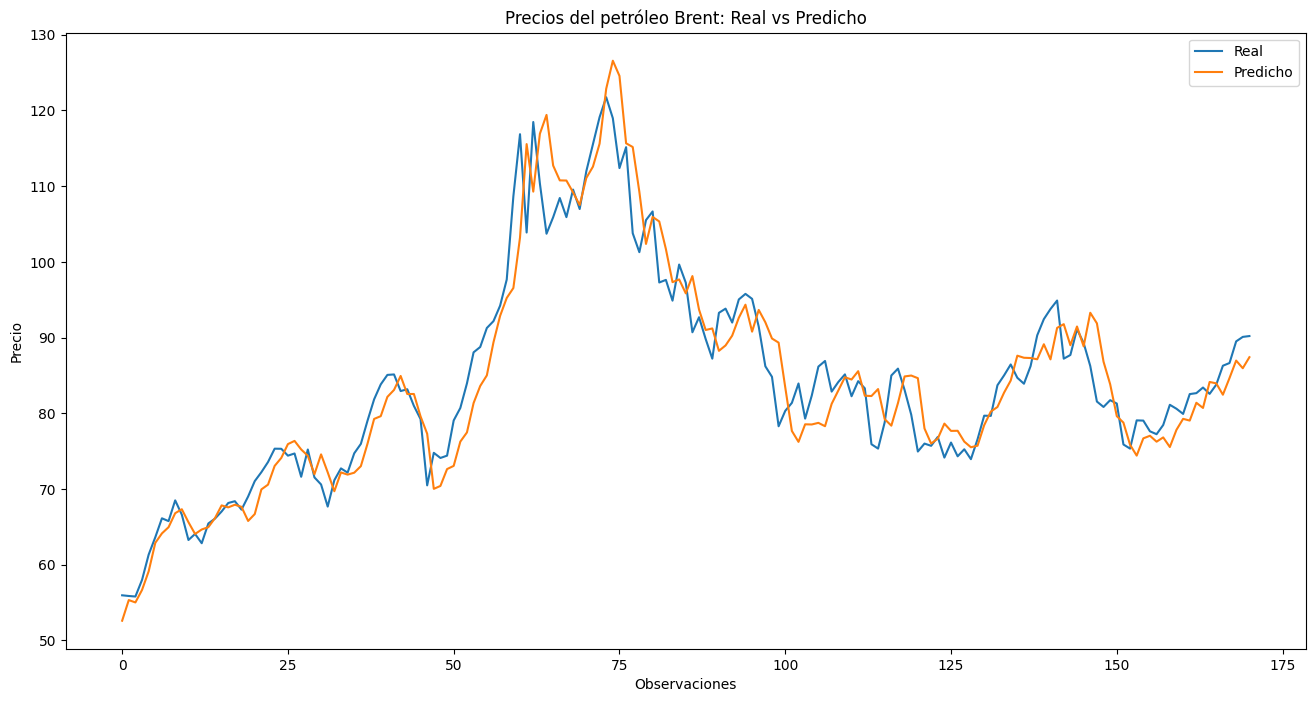

In [7]:
## SEMANAL

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo Gradient Boosting Machine con parámetros tentativos
gbm_model = GradientBoostingRegressor(n_estimators=300, max_depth=3, min_samples_split=5, 
                                      min_samples_leaf=2, max_features='sqrt', learning_rate =0.1,
                                         random_state=42)

#Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

# Entrenar el modelo
gbm_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = gbm_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.12543912081532688
MSE: 0.018659255412272886
RMSE: 0.13659888510625878
R^2: -0.6704382970901828


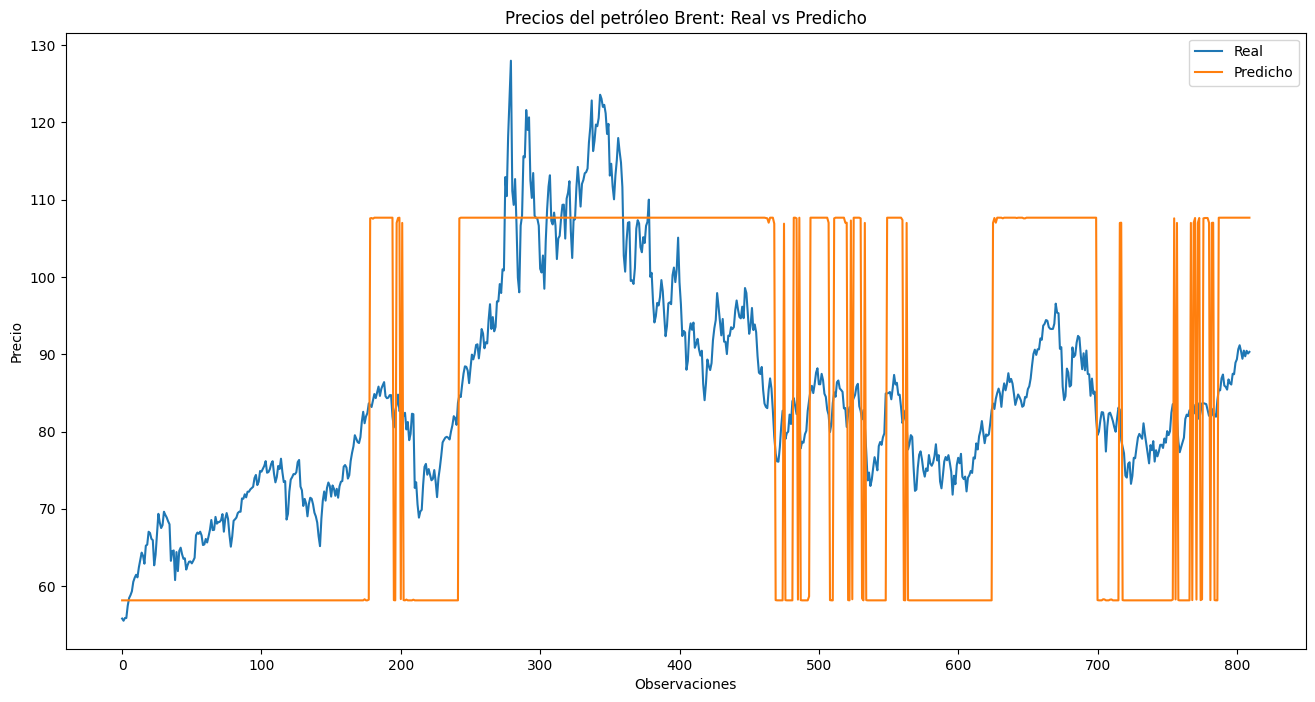

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor con una sola decisión (stump)
base_estimator = DecisionTreeRegressor(max_depth=1)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.01, random_state=42)

# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.01659789357089173
MSE: 0.00047023326118622377
RMSE: 0.021684862489446958
R^2: 0.9579031622272328


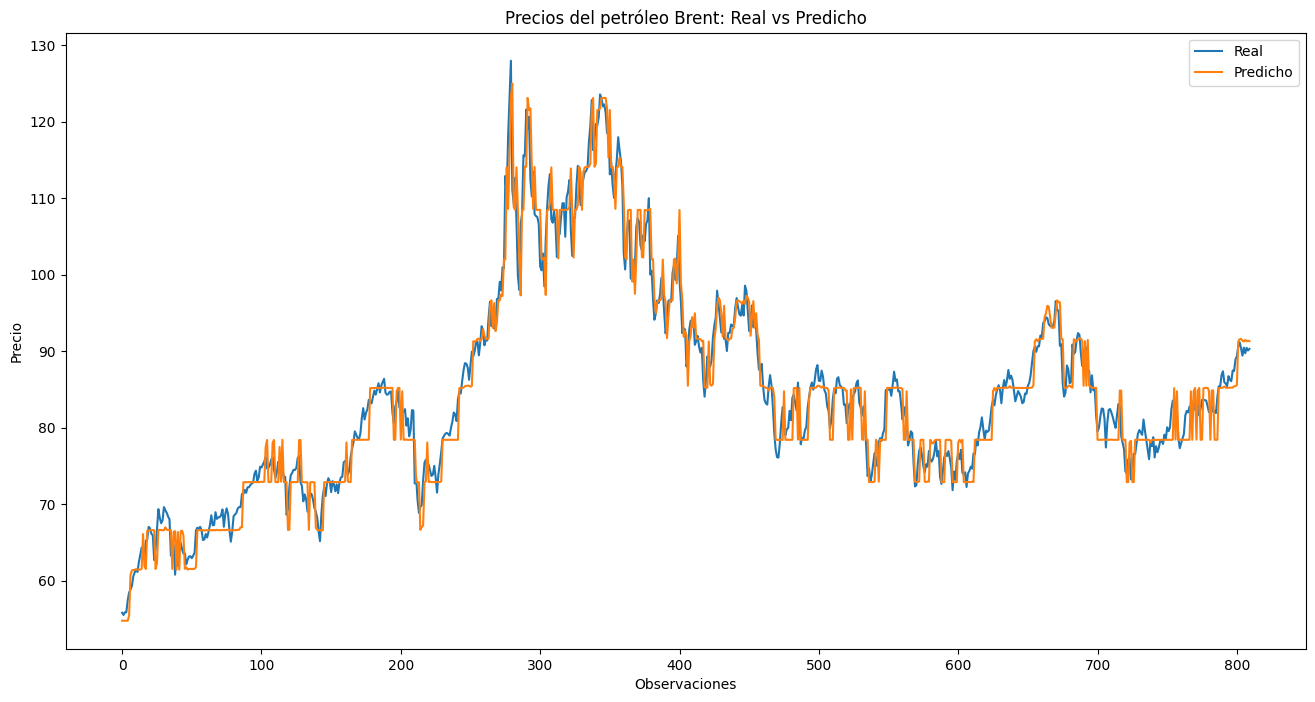

In [5]:
#esta voy a usar como diaria  PARA el TFM!!!, esta ESSSSSS!!!!!

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base
base_estimator = DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, random_state=42)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.01, random_state=42)
#base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 30, 'learning_rate': 0.001, 'n_estimators': 50

#base_estimator = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=2, random_state=42)
#ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.01, random_state=42)
# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()

C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.014457418679569308
MSE: 0.00038690038417040813
RMSE: 0.01966978353135611
R^2: 0.9653633971668525


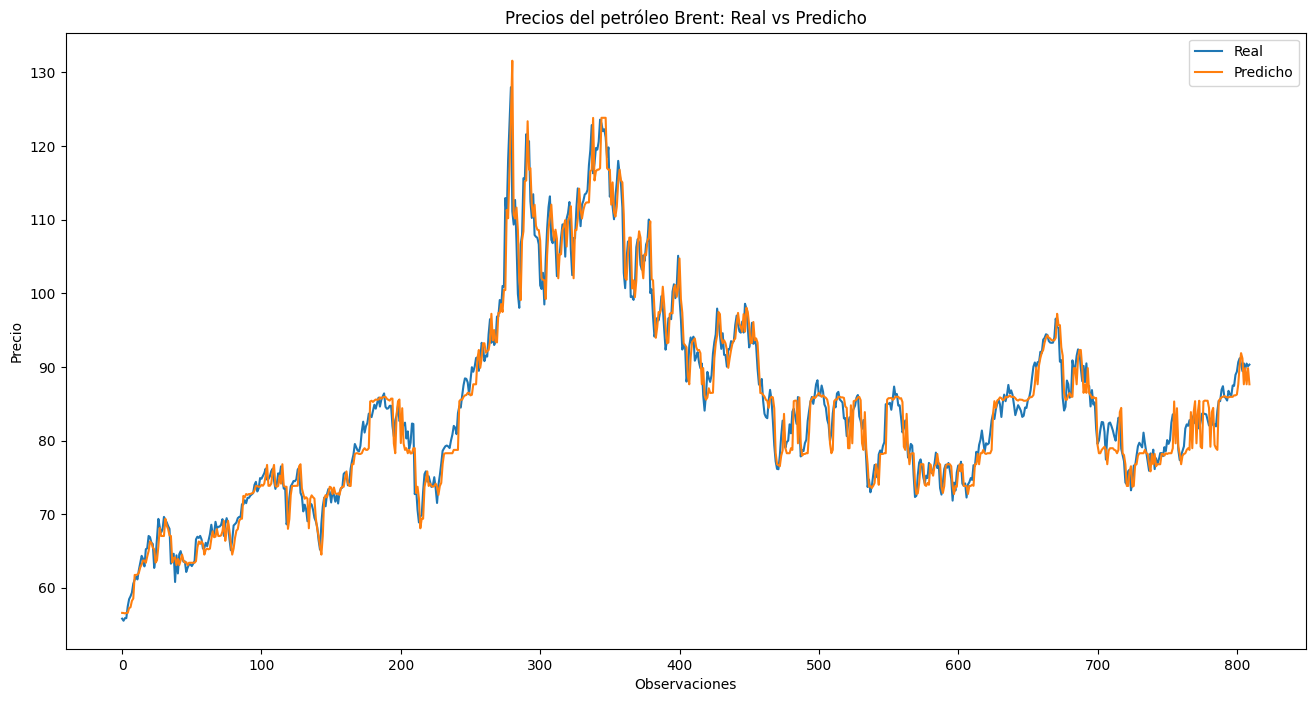

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)


# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()

C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.0149858349417277
MSE: 0.0004083795615033752
RMSE: 0.02020840323982514
R^2: 0.9634405101269238


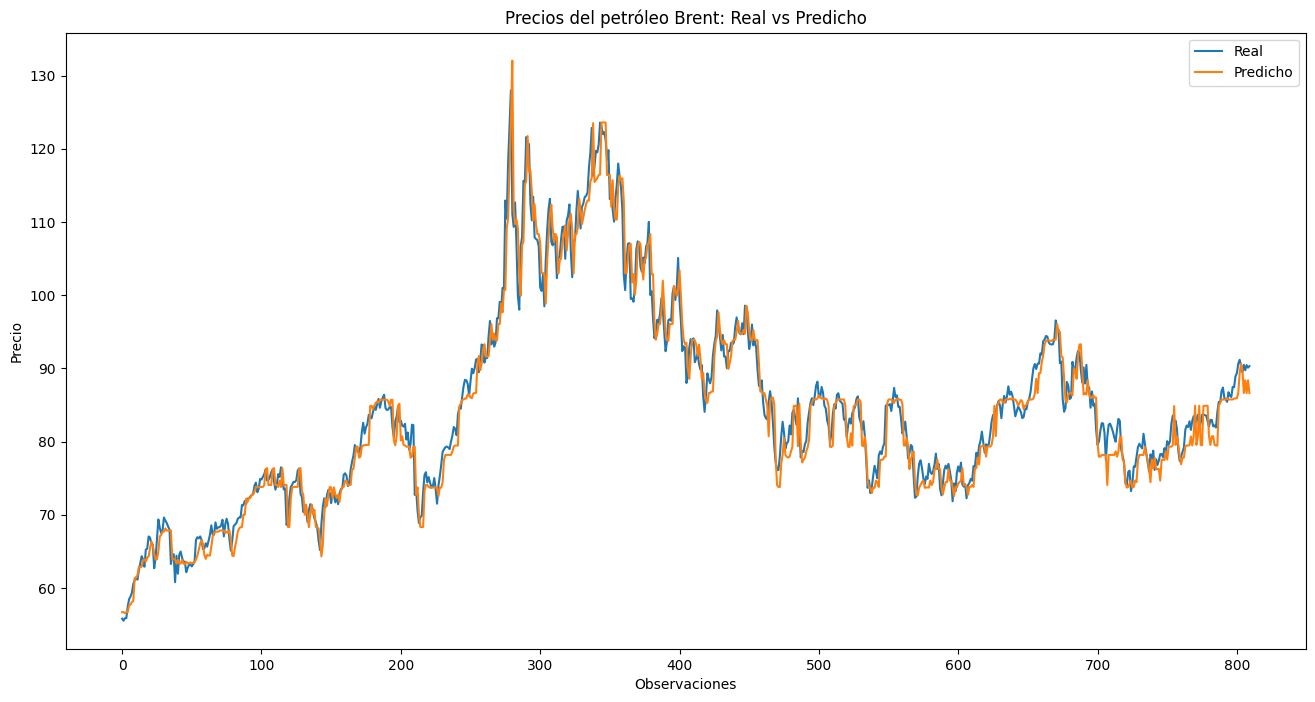

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_model = AdaBoostRegressor(base_estimator=base_estimator,
                              n_estimators=50, learning_rate=1.0, random_state=42)

# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_model = AdaBoostRegressor(base_estimator=base_estimator,
                              n_estimators=50, learning_rate=1.0, random_state=42)

# Configurar la validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular MSE usando validación cruzada
mse_scores = -cross_val_score(ada_model, x, y, cv=kfold, scoring='neg_mean_squared_error')

print("MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Standard deviation:", np.std(mse_scores))

C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version

MSE scores: [0.00027256 0.00026037 0.00029917 0.00025069 0.0002866 ]
Mean MSE: 0.0002738761612092311
Standard deviation: 1.745755428204045e-05


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.012681034174213002
MSE: 0.00033011344077986165
RMSE: 0.01816902421099883
R^2: 0.9704471522748869


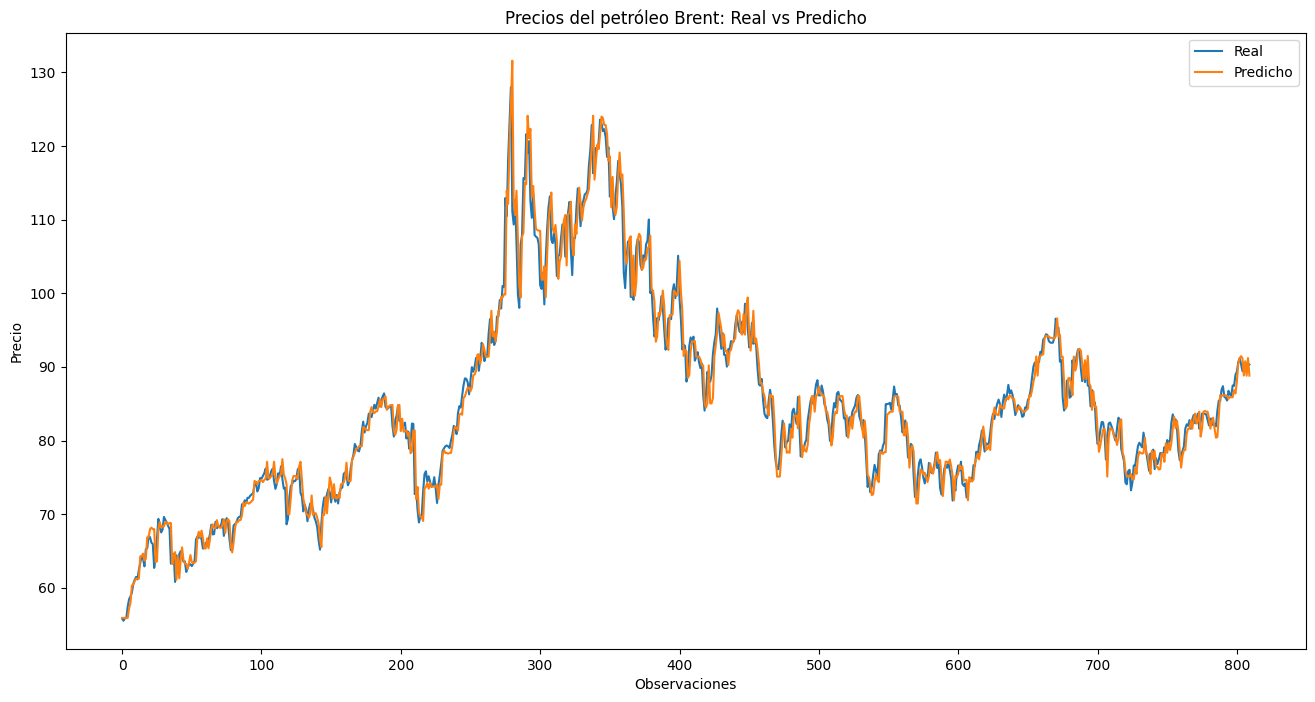

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base
base_estimator = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, random_state=42)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.01, random_state=42)
#base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 30, 'learning_rate': 0.001, 'n_estimators': 50

#base_estimator = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=2, random_state=42)
#ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.01, random_state=42)
# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MAE: 0.024176810755780584
MSE: 0.001053398216466267
RMSE: 0.032456096753403156
R^2: 0.9162276726594379


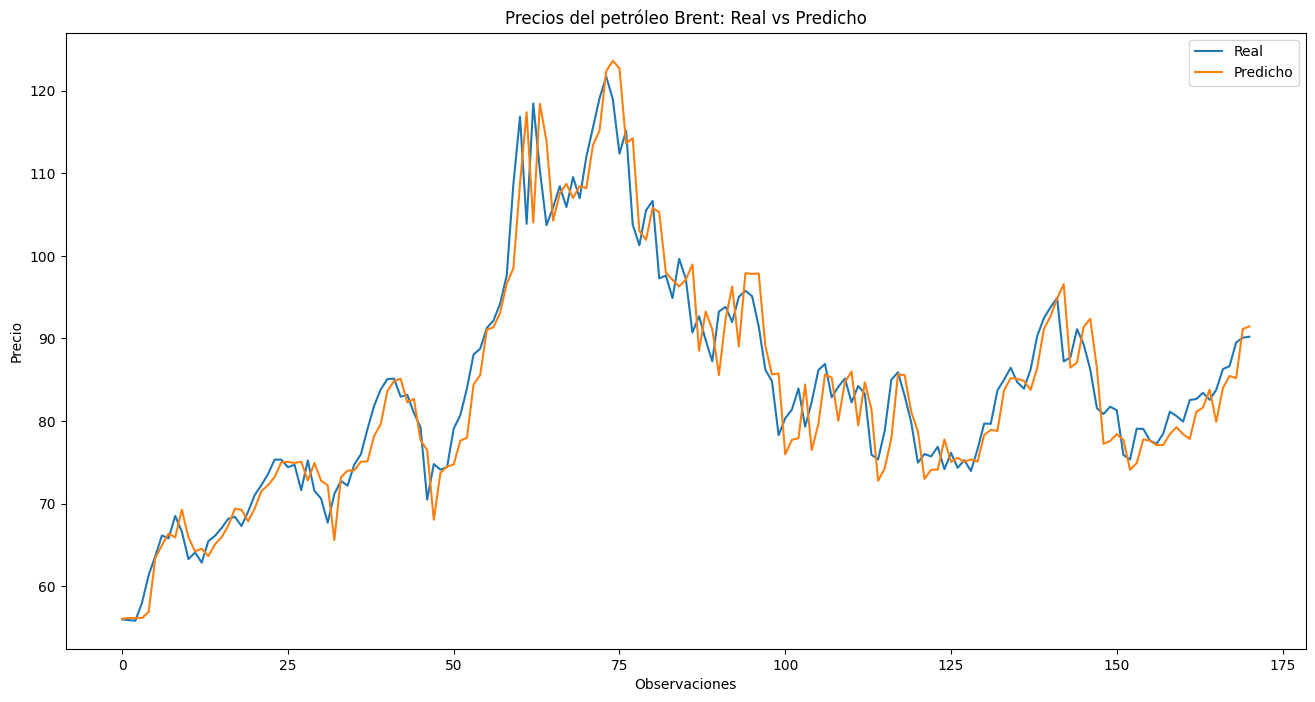

In [7]:
## SEMANAL esta voy a usar en el TFM !!!

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware


# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base utilizando los mejores hiperparámetros
base_estimator = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=10, random_state=42)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=150, learning_rate=0.01, random_state=42)

# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = ada_model.predict(x_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()



DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Entrenamiento - MAE: 0.011571369564483657, MSE: 0.0002424264643430659, RMSE: 0.015570050235727112, R^2: 0.9951464051711842
Prueba - MAE: 0.024176810755780584, MSE: 0.001053398216466267, RMSE: 0.032456096753403156, R^2: 0.9162276726594379


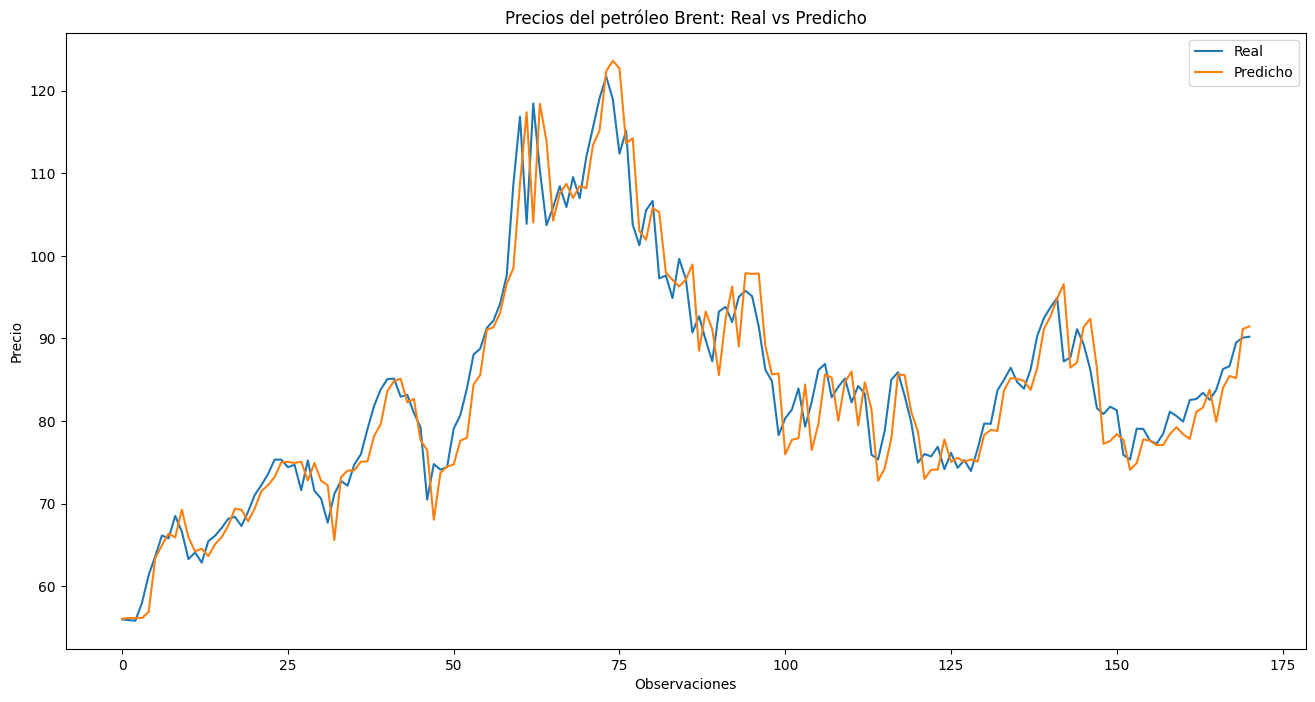

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base utilizando los mejores hiperparámetros
base_estimator = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=10, random_state=42)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=150, learning_rate=0.01, random_state=42)

# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_train_pred = ada_model.predict(x_train)
y_test_pred = ada_model.predict(x_test)

# Calcular las métricas para entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_test_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores hiperparámetros: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 8, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.001, 'n_estimators': 100}
Entrenamiento - MAE: 0.012713091365835434, MSE: 0.0003103619869948222, RMSE: 0.017617093602374432, R^2: 0.9937862751939188
Prueba - MAE: 0.02379990253905482, MSE: 0.0009984927442013593, RMSE: 0.0315989358080515, R^2: 0.9205940738204288


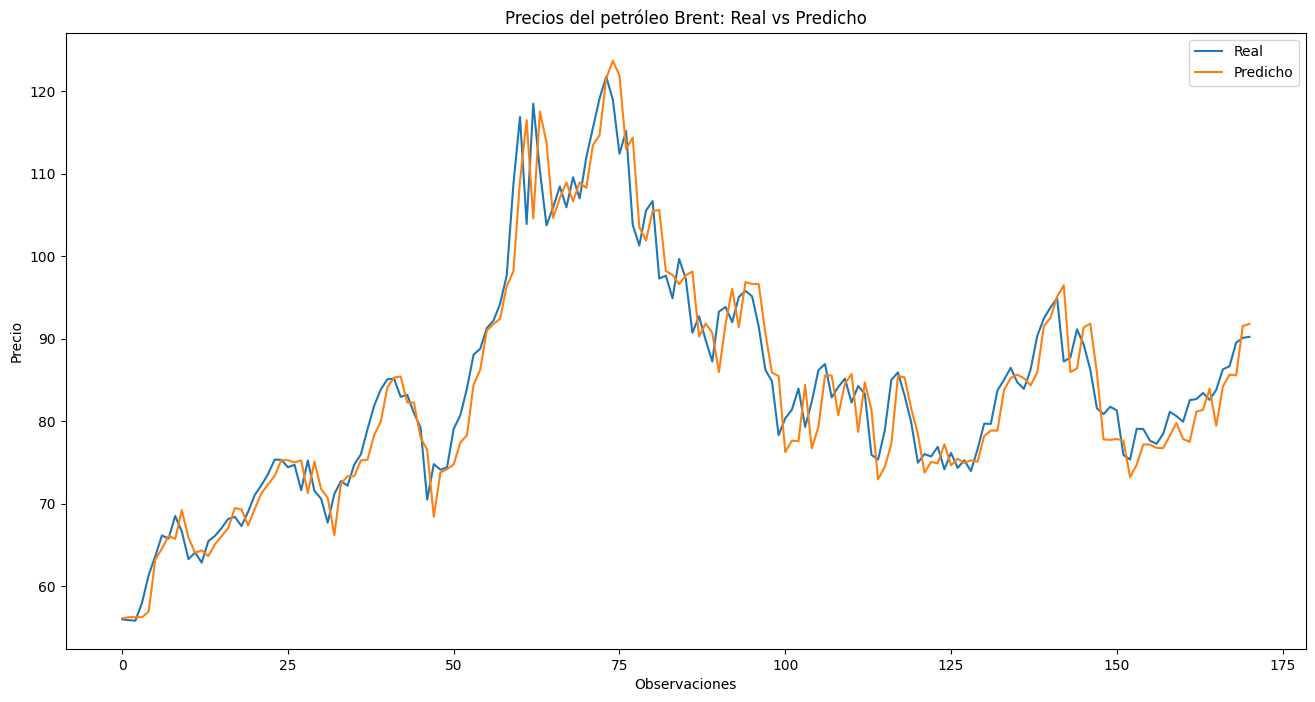

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros con mayor regularización
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001, 0.01],
    'base_estimator__max_depth': [4, 6],
    'base_estimator__min_samples_split': [10, 20],
    'base_estimator__min_samples_leaf': [4, 8]
}

# Instanciar el modelo base DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Instanciar el modelo AdaBoostRegressor
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_ada_model = grid_search.best_estimator_

# Realizar predicciones con el conjunto de prueba
y_train_pred = best_ada_model.predict(x_train)
y_test_pred = best_ada_model.predict(x_test)

# Calcular las métricas para entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_test_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores hiperparámetros: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 30, 'learning_rate': 0.1, 'n_estimators': 50}
Entrenamiento - MAE: 0.013563982371895055, MSE: 0.00030133009266723054, RMSE: 0.017358862078697166, R^2: 0.9939671018034295
Prueba - MAE: 0.023783661381844772, MSE: 0.0010195510161369616, RMSE: 0.031930408956619416, R^2: 0.9189193980689037


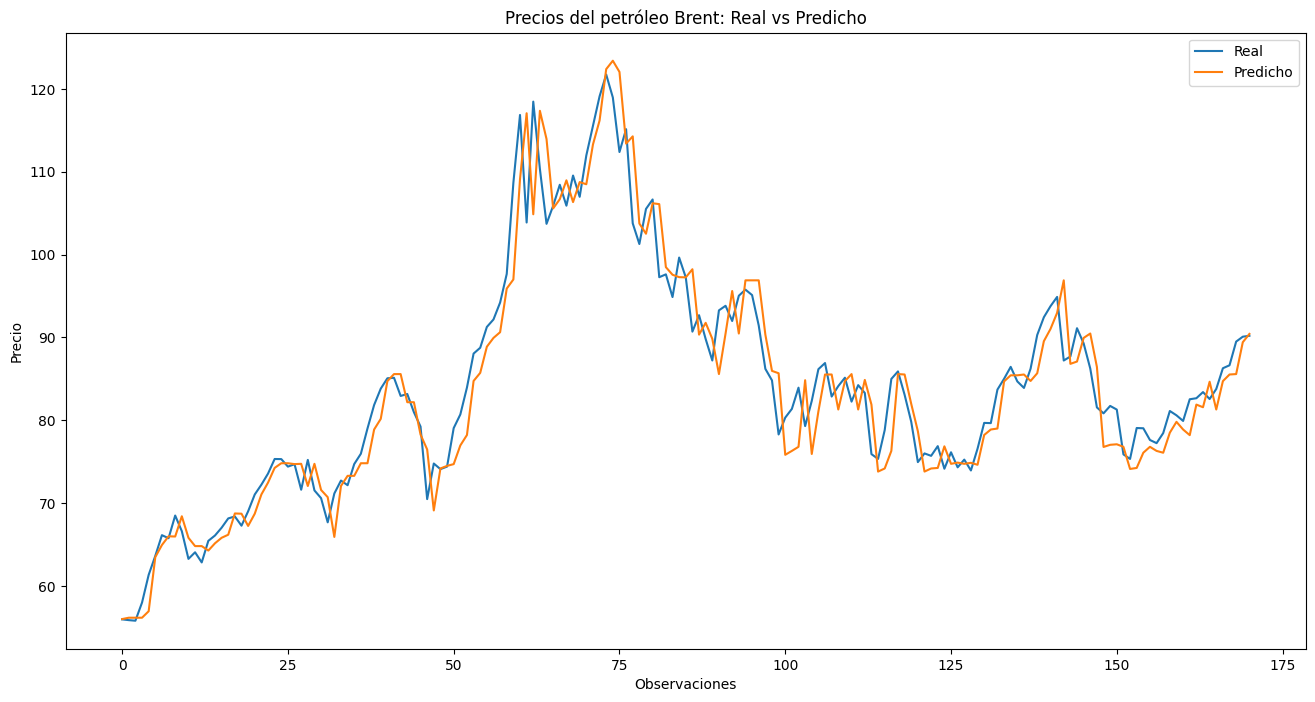

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros con un rango adecuado para evitar sobreajuste
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'base_estimator__max_depth': [3, 4, 6],
    'base_estimator__min_samples_split': [10, 20, 30],
    'base_estimator__min_samples_leaf': [4, 6, 8]
}

# Instanciar el modelo base DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Instanciar el modelo AdaBoostRegressor
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_ada_model = grid_search.best_estimator_

# Realizar predicciones con el conjunto de prueba
y_train_pred = best_ada_model.predict(x_train)
y_test_pred = best_ada_model.predict(x_test)

# Calcular las métricas para entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_test_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Entrenamiento - MAE: 0.013563982371895055, MSE: 0.00030133009266723054, RMSE: 0.017358862078697166, R^2: 0.9939671018034295
Prueba - MAE: 0.023783661381844772, MSE: 0.0010195510161369616, RMSE: 0.031930408956619416, R^2: 0.9189193980689037


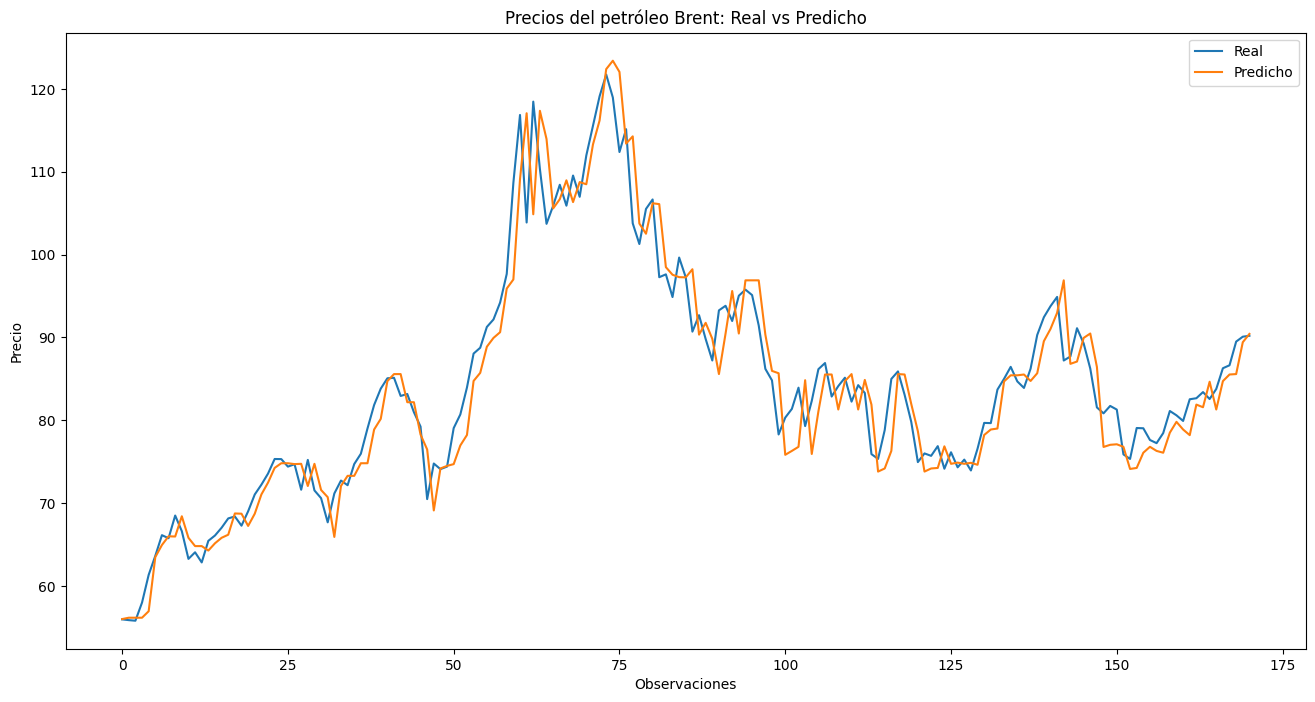

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instanciar el modelo AdaBoost con DecisionTreeRegressor como base utilizando los mejores hiperparámetros
base_estimator = DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, min_samples_split=30, random_state=42)
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.1, random_state=42)

# Entrenar el modelo
ada_model.fit(x_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_train_pred = ada_model.predict(x_train)
y_test_pred = ada_model.predict(x_test)

# Calcular las métricas para entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_test_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [4]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Obtener las fechas de inicio y fin para los conjuntos de entrenamiento y prueba
train_start_date = data_brent.index[0]
train_end_date = data_brent.index[train_size - 1]
test_start_date = data_brent.index[train_size]
test_end_date = data_brent.index[-1]

print(f"La fecha de inicio del conjunto de entrenamiento es: {train_start_date}")
print(f"La fecha de fin del conjunto de entrenamiento es: {train_end_date}")
print(f"La fecha de inicio del conjunto de prueba es: {test_start_date}")
print(f"La fecha de fin del conjunto de prueba es: {test_end_date}")

La fecha de inicio del conjunto de entrenamiento es: 2007-07-30 00:00:00-04:00
La fecha de fin del conjunto de entrenamiento es: 2020-12-23 00:00:00-05:00
La fecha de inicio del conjunto de prueba es: 2020-12-24 00:00:00-05:00
La fecha de fin del conjunto de prueba es: 2024-04-16 00:00:00-04:00


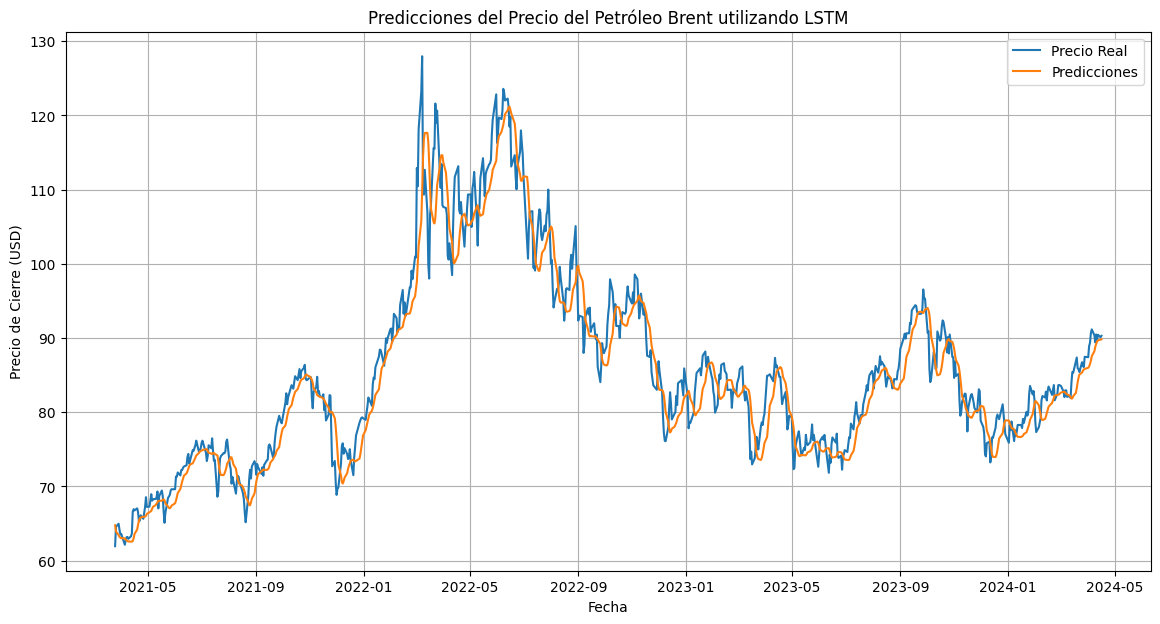

In [3]:
# Graficar los resultados
plt.figure(figsize=(14, 7))
# Ajustar el índice para que coincida con las fechas de las predicciones
test_dates = data_brent.index[train_size + seq_length:]
plt.plot(test_dates, data_brent['Close'].iloc[train_size + seq_length:], label='Precio Real')
plt.plot(test_dates, predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10
102/102 [==============================] - 5s 28ms/step - loss: 0.0107
Epoch 2/10
102/102 [==============================] - 3s 28ms/step - loss: 9.1629e-04
Epoch 3/10
102/102 [==============================] - 3s 29ms/step - loss: 8.1535e-04
Epoch 4/10
102/102 [==============================] - 3s 32ms/step - loss: 7.3134e-04
Epoch 5/10
102/102 [==============================] - 3s 27ms/step - loss: 6.2541e-04
Epoch 6/10
102/102 [==============================] - 3s 27ms/step - loss: 6.2522e-04
Epoch 7/10
102/102 [==============================] - 3s 27ms/step - loss: 5.5289e-04
Epoch 8/10
102/102 [==============================] - 3s 27ms/step - loss: 5.6652e-04
Epoch 9/10
102/102 [==============================] - 3s 29ms/step - loss: 5.3049e-04
Epoch 10/10
25/25 [==============================] - 1s 10ms/step
MAE: 2.6587282007390804
MSE: 12.88164079241266
RMSE: 3.5891002761712665
R^2: 0.9214227143969955


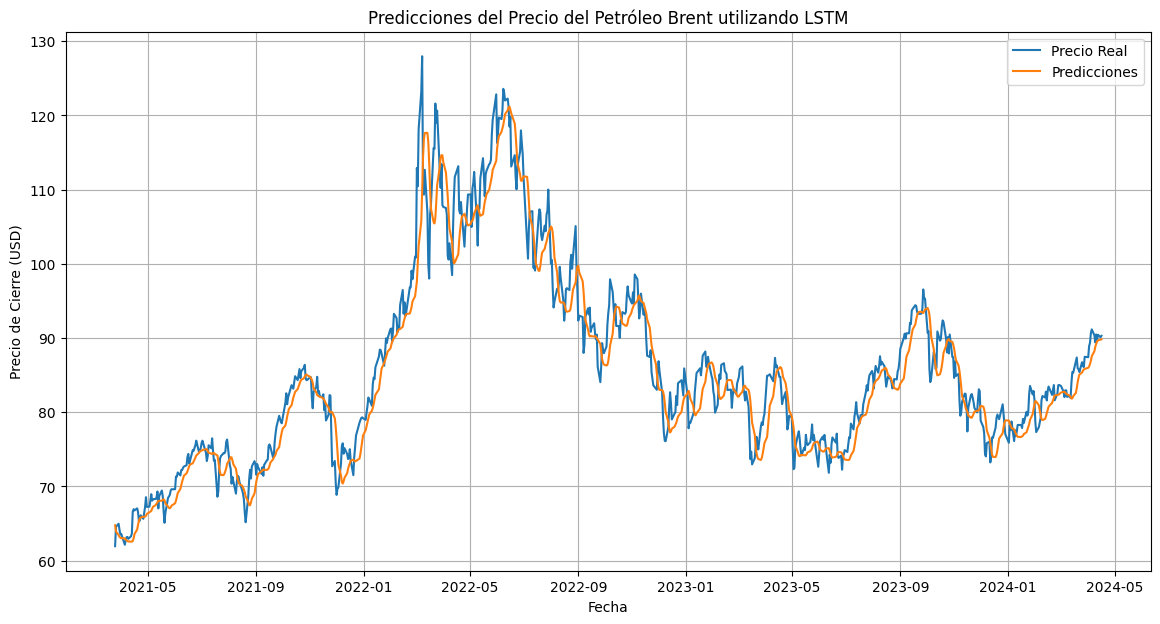

In [1]:
##aqui si esta bien hecha la division de train y test y empieza a contar desde el 21 -05.

#prediccion diaria definitiva para el TFM!!!!!!!
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 60

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
102/102 [==============================] - 5s 27ms/step - loss: 0.0120
Epoch 2/10
102/102 [==============================] - 3s 28ms/step - loss: 8.4745e-04
Epoch 3/10
102/102 [==============================] - 3s 31ms/step - loss: 7.8174e-04
Epoch 4/10
102/102 [==============================] - 3s 34ms/step - loss: 7.1040e-04
Epoch 5/10
102/102 [==============================] - 4s 34ms/step - loss: 6.8078e-04
Epoch 6/10
102/102 [==============================] - 4s 37ms/step - loss: 5.8720e-04
Epoch 7/10
102/102 [==============================] - 4s 36ms/step - loss: 5.8107e-04
Epoch 8/10
102/102 [==============================] - 3s 34ms/step - loss: 5.5355e-04
Epoch 9/10
102/102 [==============================] - 4s 35ms/step - loss: 5.2974e-04
Epoch 10/10
25/25 [==============================] - 1s 16ms/step
MAE: 2.76802876955503
MSE: 15.730204252077227
RMSE: 3.966132152623917
R^2: 0.9040466372236448


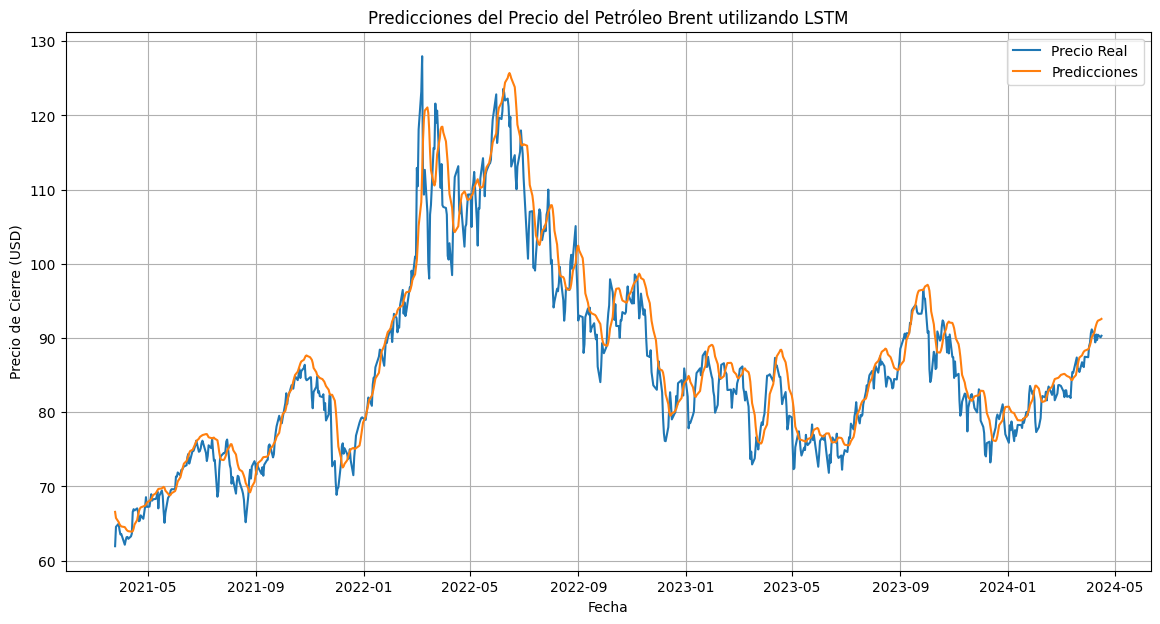

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 60

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
101/101 [==============================] - 8s 53ms/step - loss: 0.0095
Epoch 2/10
101/101 [==============================] - 6s 56ms/step - loss: 8.2093e-04
Epoch 3/10
101/101 [==============================] - 6s 60ms/step - loss: 7.0302e-04
Epoch 4/10
101/101 [==============================] - 6s 56ms/step - loss: 6.4504e-04
Epoch 5/10
101/101 [==============================] - 4s 45ms/step - loss: 5.9182e-04
Epoch 6/10
101/101 [==============================] - 5s 45ms/step - loss: 6.1102e-04
Epoch 7/10
101/101 [==============================] - 5s 52ms/step - loss: 5.1638e-04
Epoch 8/10
101/101 [==============================] - 5s 45ms/step - loss: 4.8543e-04
Epoch 9/10
101/101 [==============================] - 5s 46ms/step - loss: 4.8897e-04
Epoch 10/10
23/23 [==============================] - 1s 21ms/step
Error Cuadrático Medio: 12.498908578127955


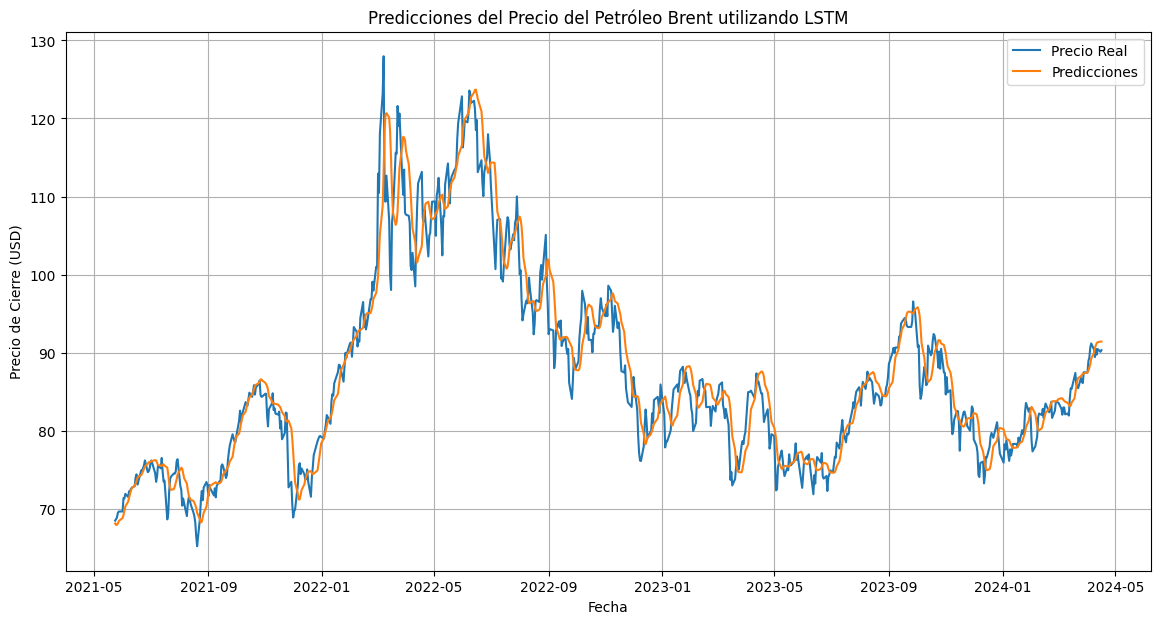

In [6]:
#diario

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Filtrar los datos a partir del año 2007 si no se han filtrado previamente
#data_brent = data_brent[data_brent.index.year >= 2007]

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 100

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)

# Calcular el error cuadrático medio
mse = mean_squared_error(data_brent['Close'][-len(predictions):], predictions)
print("Error Cuadrático Medio:", mse)

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
101/101 [==============================] - 7s 46ms/step - loss: 0.0134
Epoch 2/10
101/101 [==============================] - 5s 46ms/step - loss: 9.0486e-04
Epoch 3/10
101/101 [==============================] - 4s 43ms/step - loss: 8.1187e-04
Epoch 4/10
101/101 [==============================] - 4s 44ms/step - loss: 7.6935e-04
Epoch 5/10
101/101 [==============================] - 5s 48ms/step - loss: 6.4588e-04
Epoch 6/10
101/101 [==============================] - 4s 44ms/step - loss: 6.2574e-04
Epoch 7/10
101/101 [==============================] - 4s 44ms/step - loss: 6.0143e-04
Epoch 8/10
101/101 [==============================] - 5s 45ms/step - loss: 5.4175e-04
Epoch 9/10
101/101 [==============================] - 5s 47ms/step - loss: 4.8778e-04
Epoch 10/10
23/23 [==============================] - 1s 16ms/step
MAE: 2.60581081860686
MSE: 13.112499369917382
RMSE: 3.6211185246988786
R^2: 0.9128544673434555


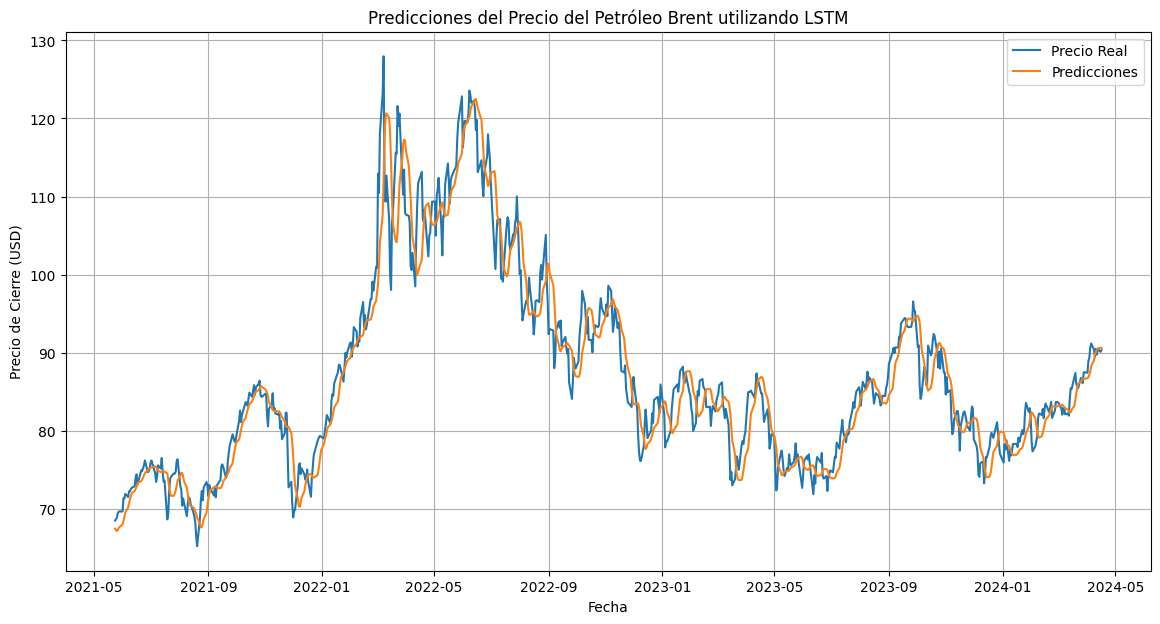

In [11]:
#diario

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 100

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
102/102 [==============================] - 5s 26ms/step - loss: 0.0139
Epoch 2/10
102/102 [==============================] - 3s 26ms/step - loss: 9.6137e-04
Epoch 3/10
102/102 [==============================] - 3s 27ms/step - loss: 8.7012e-04
Epoch 4/10
102/102 [==============================] - 3s 26ms/step - loss: 7.5145e-04
Epoch 5/10
102/102 [==============================] - 3s 29ms/step - loss: 6.9999e-04
Epoch 6/10
102/102 [==============================] - 3s 28ms/step - loss: 6.5389e-04
Epoch 7/10
102/102 [==============================] - 3s 27ms/step - loss: 6.2268e-04
Epoch 8/10
102/102 [==============================] - 3s 28ms/step - loss: 5.6236e-04
Epoch 9/10
102/102 [==============================] - 3s 27ms/step - loss: 4.9435e-04
Epoch 10/10
102/102 [==============================] - 3s 28ms/step - loss: 4.5749e-04
Epoch 1/10
82/82 [==============================] - 3s 40ms/step - loss: 4.3020e-04 - val_loss: 4.0082e-04
Epoch 2/10
82/82 [==================

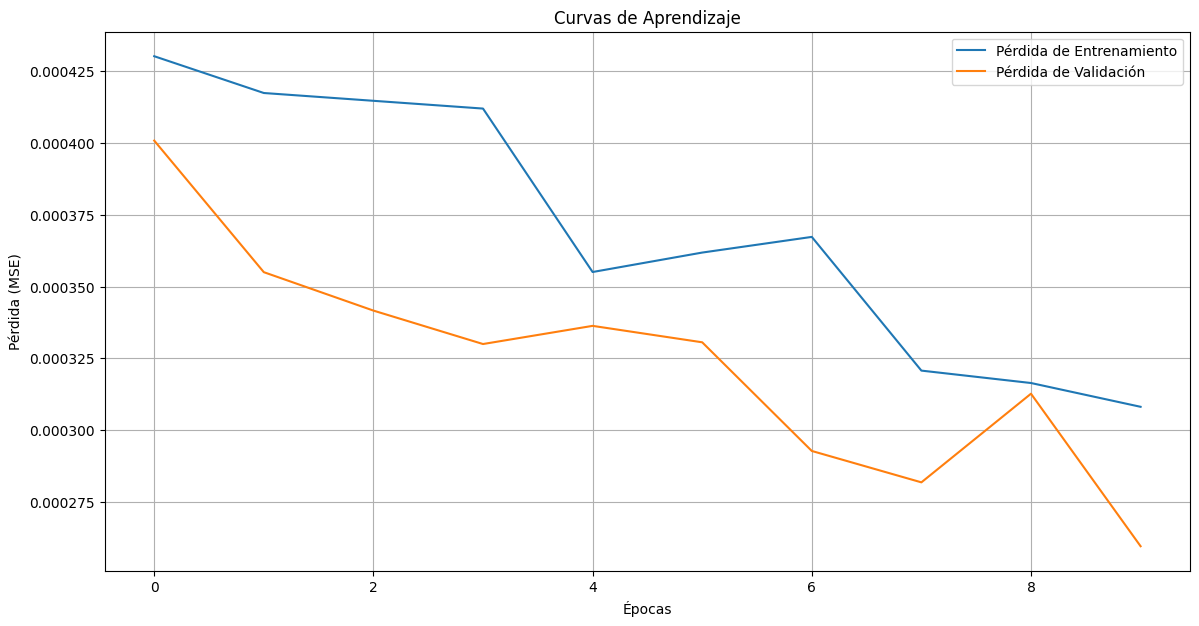

25/25 [==============================] - 1s 10ms/step
MAE: 2.087949376292043
MSE: 8.244583167093252
RMSE: 2.871338218861242
R^2: 0.9497085055670867


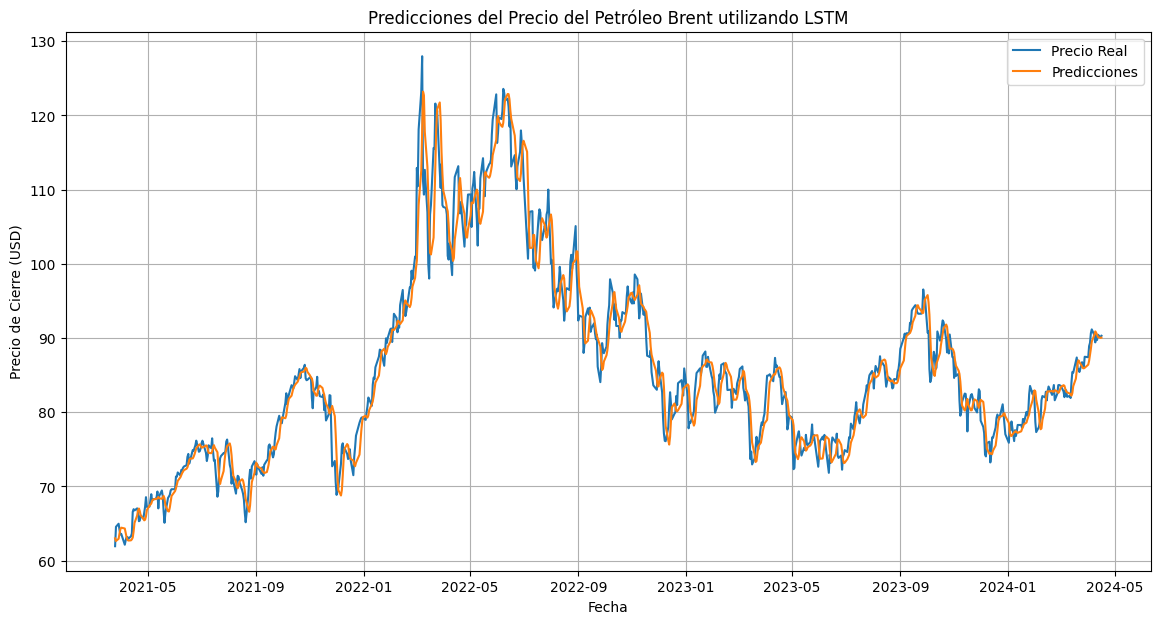

In [2]:
#prediccion diaria definitiva para el TFM 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 60

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Entrenar el modelo y guardar el historial
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Extraer las pérdidas de entrenamiento y validación del historial
train_loss = history.history['loss']
val_loss = history.history.get('val_loss', None)  # None si no hay validación

# Graficar las curvas de aprendizaje
plt.figure(figsize=(14, 7))
plt.plot(train_loss, label='Pérdida de Entrenamiento')
if val_loss is not None:
    plt.plot(val_loss, label='Pérdida de Validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20
82/82 [==============================] - 5s 35ms/step - loss: 0.0150 - val_loss: 8.9419e-04
Epoch 2/20
82/82 [==============================] - 2s 29ms/step - loss: 9.7256e-04 - val_loss: 8.8854e-04
Epoch 3/20
82/82 [==============================] - 2s 28ms/step - loss: 9.1633e-04 - val_loss: 7.8122e-04
Epoch 4/20
82/82 [==============================] - 2s 29ms/step - loss: 8.1639e-04 - val_loss: 7.1499e-04
Epoch 5/20
82/82 [==============================] - 3s 33ms/step - loss: 7.2306e-04 - val_loss: 6.5665e-04
Epoch 6/20
82/82 [==============================] - 3s 32ms/step - loss: 6.5219e-04 - val_loss: 6.1647e-04
Epoch 7/20
82/82 [==============================] - 3s 31ms/step - loss: 6.5841e-04 - val_loss: 7.8243e-04
Epoch 8/20
82/82 [==============================] - 2s 29ms/step - loss: 6.3472e-04 - val_loss: 5.5965e-04
Epoch 9/20
82/82 [==============================] - 2s 28ms/step - loss: 6.0469e-04 - val_loss: 5.3912e-04
Epoch 10/20
82/82 [======================

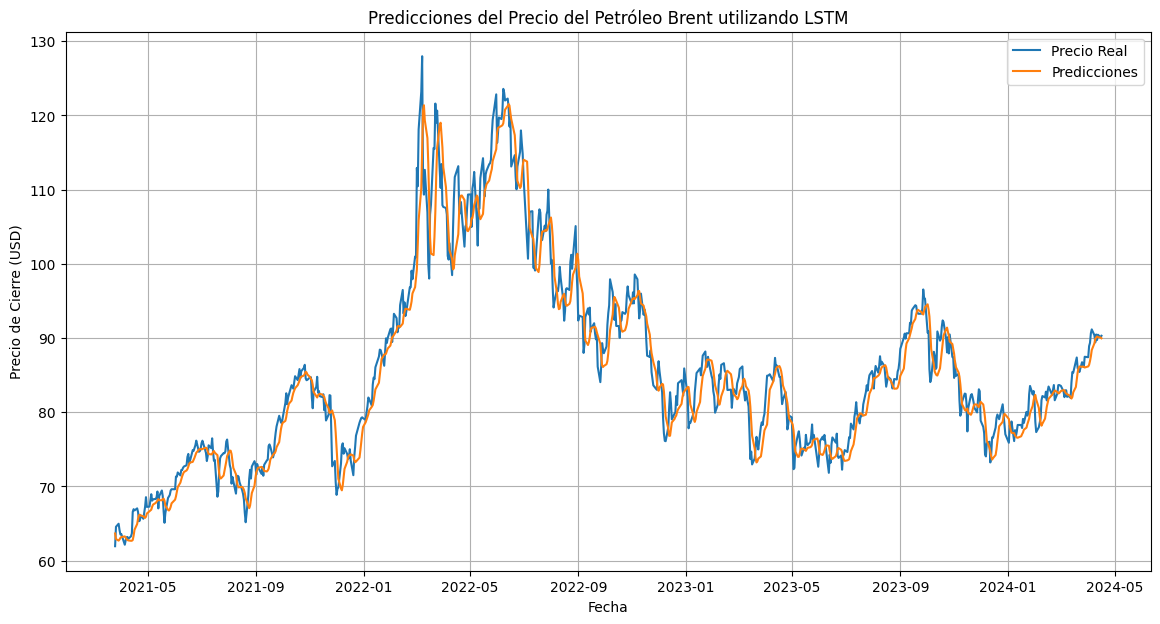

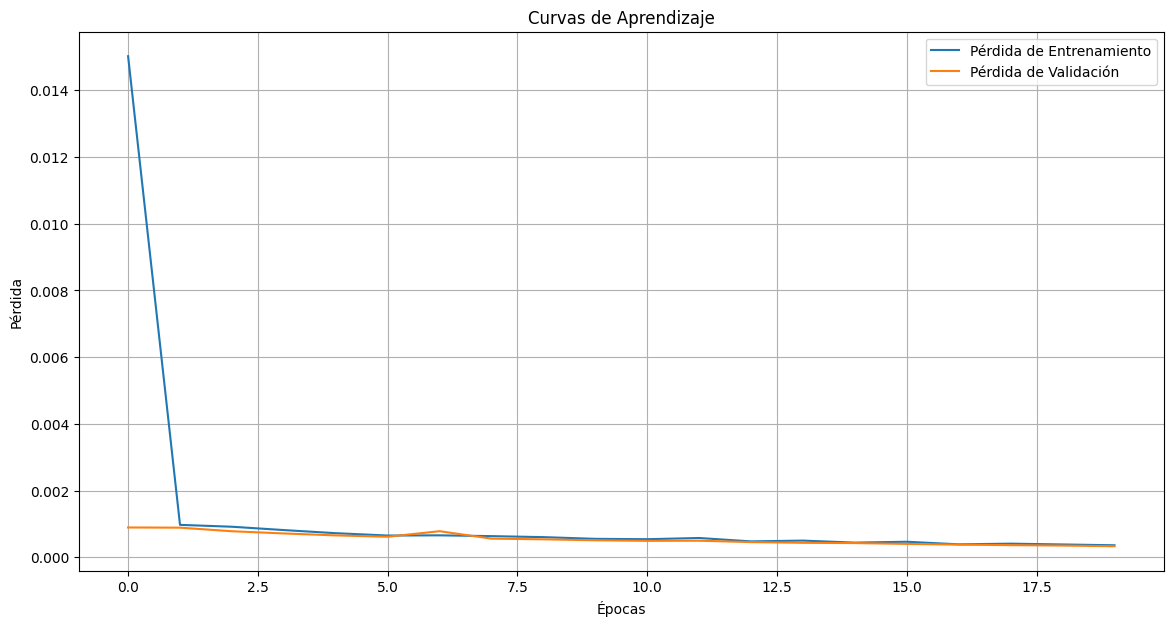

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 60

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con un conjunto de validación
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las curvas de aprendizaje
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/20
81/81 [==============================] - 7s 58ms/step - loss: 0.0181 - val_loss: 9.4470e-04
Epoch 2/20
81/81 [==============================] - 4s 46ms/step - loss: 8.7398e-04 - val_loss: 7.6838e-04
Epoch 3/20
81/81 [==============================] - 4s 48ms/step - loss: 8.3119e-04 - val_loss: 7.2743e-04
Epoch 4/20
81/81 [==============================] - 4s 47ms/step - loss: 7.6137e-04 - val_loss: 6.7886e-04
Epoch 5/20
81/81 [==============================] - 5s 59ms/step - loss: 7.4012e-04 - val_loss: 6.2899e-04
Epoch 6/20
81/81 [==============================] - 5s 57ms/step - loss: 6.3710e-04 - val_loss: 5.8993e-04
Epoch 7/20
81/81 [==============================] - 4s 54ms/step - loss: 6.0675e-04 - val_loss: 5.8033e-04
Epoch 8/20
81/81 [==============================] - 4s 50ms/step - loss: 6.0695e-04 - val_loss: 5.8980e-04
Epoch 9/20
81/81 [==============================] - 4s 53ms/step - loss: 6.1665e-04 - val_loss: 5.5366e-04
Epoch 10/20
81/81 [======================

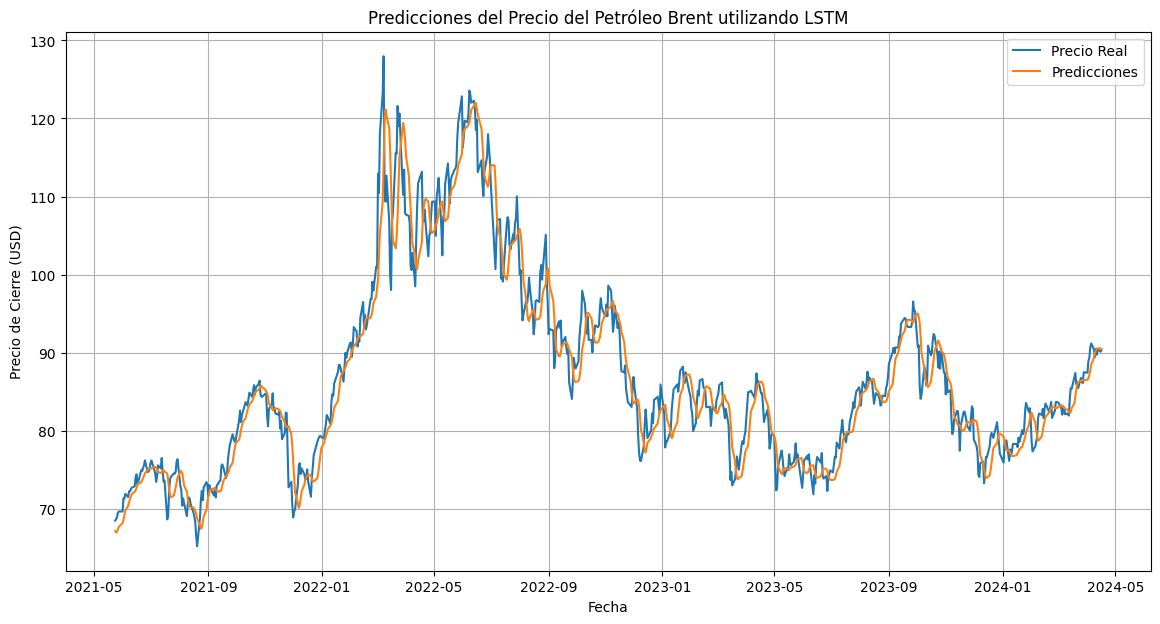

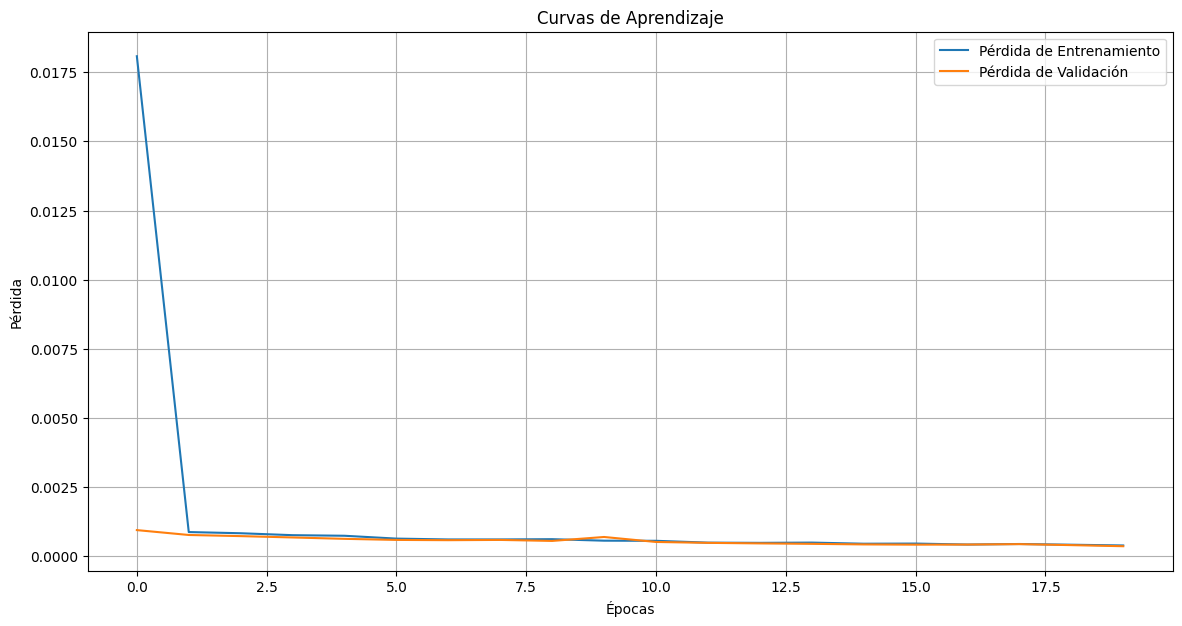

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 100

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con un conjunto de validación
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las curvas de aprendizaje
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
101/101 [==============================] - 6s 43ms/step - loss: 0.0117
Epoch 2/10
101/101 [==============================] - 4s 43ms/step - loss: 9.3350e-04
Epoch 3/10
101/101 [==============================] - 5s 50ms/step - loss: 8.1328e-04
Epoch 4/10
101/101 [==============================] - 4s 44ms/step - loss: 7.3667e-04
Epoch 5/10
101/101 [==============================] - 5s 46ms/step - loss: 7.3342e-04
Epoch 6/10
101/101 [==============================] - 5s 53ms/step - loss: 6.5996e-04
Epoch 7/10
101/101 [==============================] - 5s 48ms/step - loss: 6.1962e-04
Epoch 8/10
101/101 [==============================] - 5s 46ms/step - loss: 5.6645e-04
Epoch 9/10
101/101 [==============================] - 5s 48ms/step - loss: 5.3655e-04
Epoch 10/10
23/23 [==============================] - 1s 16ms/step
MAE: 3.27181899188316
MSE: 17.1808563811565
RMSE: 4.144979659920721
R^2: 0.8858162095117869


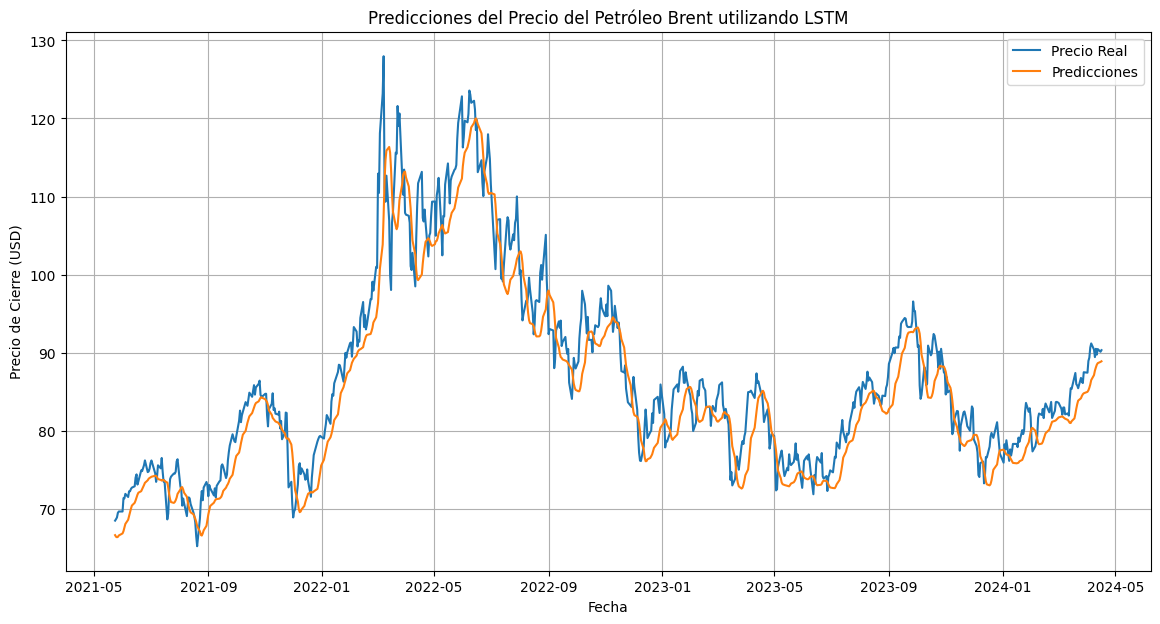

KeyError: 'val_loss'

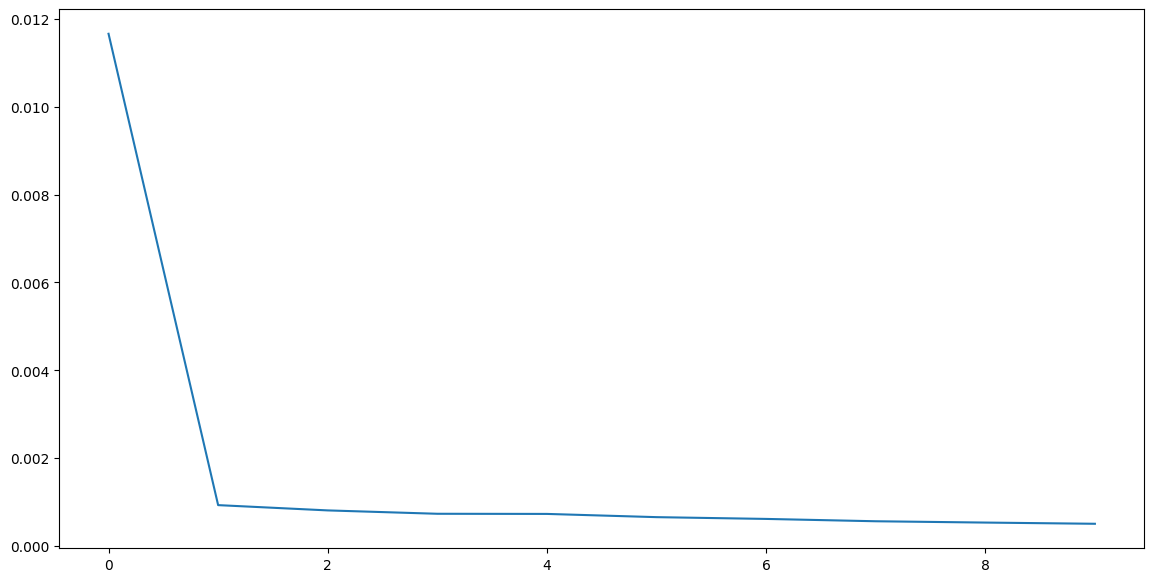

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')

# Convertir la columna 'Date' a tipo datetime
data_brent['Date'] = pd.to_datetime(data_brent['Date'])

# Establecer la columna 'Date' como índice del DataFrame
data_brent.set_index('Date', inplace=True)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_brent['Close'].values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# Función para crear secuencias temporales
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Definir la longitud de la secuencia temporal
seq_length = 100

# Crear las secuencias temporales
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular las métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], data_brent['Close'][-len(predictions):], label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las curvas de aprendizaje
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Aprendizaje')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
18/18 [==============================] - 3s 31ms/step - loss: 0.1111 - val_loss: 0.0257
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0169 - val_loss: 0.0041
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0079
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0051
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0021
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0020
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 11

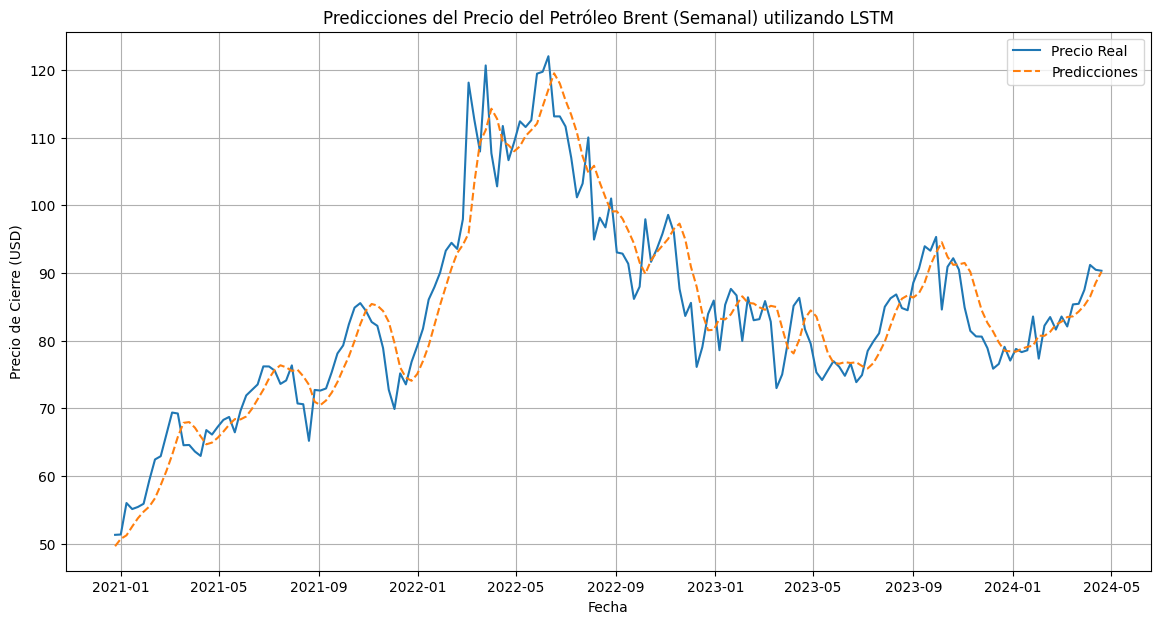

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.initializers import GlorotUniform  # Bueno para evitar gradientes que explotan/vanish
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'], utc=True)
data_brent.set_index('Date', inplace=True)

# Resample los datos a frecuencia semanal, tomando el último valor
weekly_data = data_brent['Close'].resample('W-FRI').last().dropna()

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_weekly_data = scaler.fit_transform(weekly_data.values.reshape(-1, 1))

# Creación de secuencias
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        seq_x, seq_y = data[i:(i + seq_length), 0], data[i + seq_length, 0]
        if not np.isnan(seq_x).any() and not np.isnan(seq_y):
            x.append(seq_x)
            y.append(seq_y)
    return np.array(x), np.array(y)

seq_length = 5  # Más corto para datos semanales
x, y = create_sequences(scaled_weekly_data, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Definir el modelo LSTM para datos semanales
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1), kernel_initializer=GlorotUniform(seed=42)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, kernel_initializer=GlorotUniform(seed=42)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Realizar predicciones
predictions = model.predict(x_test)

# Invertir la normalización
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular métricas
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_inv, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(weekly_data.index[-len(predictions):], weekly_data[-len(predictions):], label='Precio Real')
plt.plot(weekly_data.index[-len(predictions):], predictions, label='Predicciones', linestyle='--')
plt.title('Predicciones del Precio del Petróleo Brent (Semanal) utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50
22/22 [==============================] - 3s 32ms/step - loss: 0.0790 - val_loss: 0.0099
Epoch 2/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0025
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0023
Epoch 4/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 5/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0026
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 8/50
22/22 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0027
Epoch 9/50
22/22 [==============================] - 0s 7ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0029
Epoch 11/50
22/22 

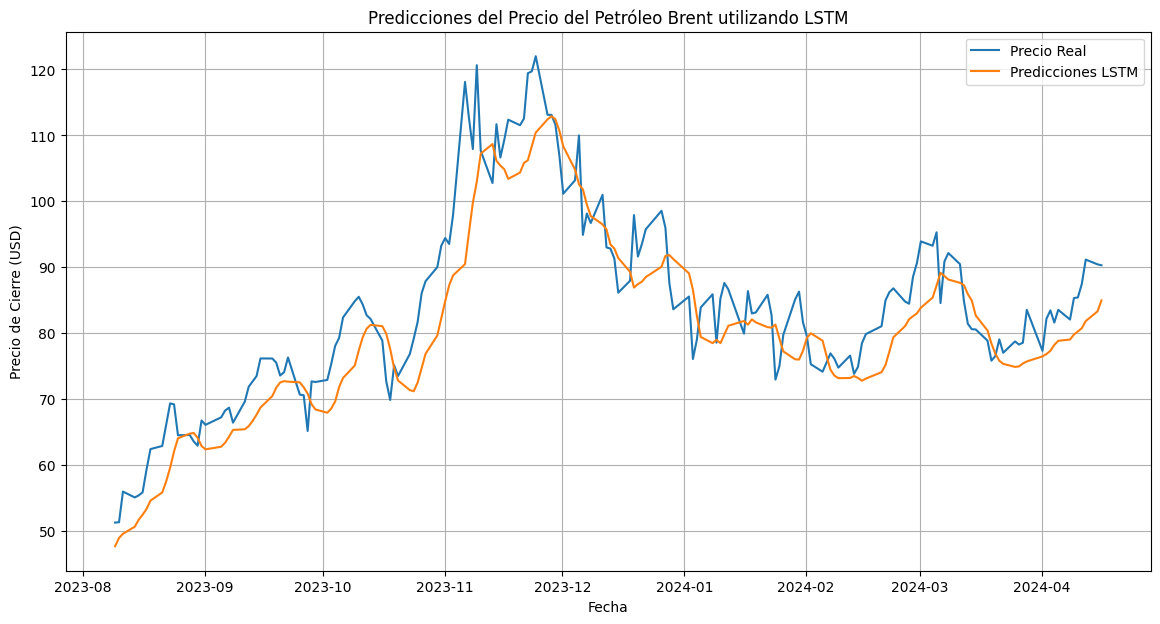

In [5]:
#semanal

#aumentamos la paciencia a 20 para que aumente el umbral de deteccion de en la perdida de validacion durante las epocas 

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.initializers import GlorotUniform  # Bueno para evitar gradientes que explotan/vanish
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'], utc=True)
data_brent.set_index('Date', inplace=True)

# Resample los datos a frecuencia semanal, tomando el último valor
weekly_data = data_brent['Close'].resample('W-FRI').last().dropna()

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_weekly_data = scaler.fit_transform(weekly_data.values.reshape(-1, 1))

# Creación de secuencias
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        seq_x, seq_y = data[i:(i + seq_length), 0], data[i + seq_length, 0]
        if not np.isnan(seq_x).any() and not np.isnan(seq_y):
            x.append(seq_x)
            y.append(seq_y)
    return np.array(x), np.array(y)

seq_length = 5  # Más corto para datos semanales
x, y = create_sequences(scaled_weekly_data, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Establecer una semilla para el inicializador
seed = 42
initializer = GlorotUniform(seed=seed)

# Modelo LSTM con inicializador GlorotUniform y semilla
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1), kernel_initializer=initializer),
    Dropout(0.3),  # Incrementado para regularización
    LSTM(50, return_sequences=False, kernel_initializer=initializer),
    Dropout(0.3),  # Incrementado para regularización
    Dense(1, kernel_initializer=initializer)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Si quieres que el modelo se entrene por más tiempo antes de que se detenga,
# puedes aumentar el valor de 'patience'.
patience_value = 20  # Aumenta este valor si quieres esperar más épocas antes de detener el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=patience_value, restore_best_weights=True)

# Entrenamiento
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

# Asegúrate de que no hay NaNs en las predicciones
if np.isnan(history.history['loss']).any() or np.isnan(history.history['val_loss']).any():
    raise ValueError("Se encontraron NaN en la historia de entrenamiento.")

# Predicciones
predictions = model.predict(x_test)
if np.isnan(predictions).any():
    raise ValueError("Se encontraron NaN en las predicciones.")

predictions = scaler.inverse_transform(predictions)

# Calcular las métricas
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_rescaled, predictions)
mae = mean_absolute_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)
rmse = math.sqrt(mse)


print("Error Cuadrático Medio semanal de LSTM - MSEc:", mse)
print("Error Absoluto Medio semanal de LSTM - MAE:", mae)
print("R^2 semanal:", r2)
print("RMSE:", rmse)

# Gráficos
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones LSTM')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


22/22 [==============================] - 3s 33ms/step - loss: 0.0685 - val_loss: 0.0090
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0111 - val_loss: 0.0024
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0087 - val_loss: 0.0022
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 8/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 0.0023
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0026
Epoch 11/100
22/22 [

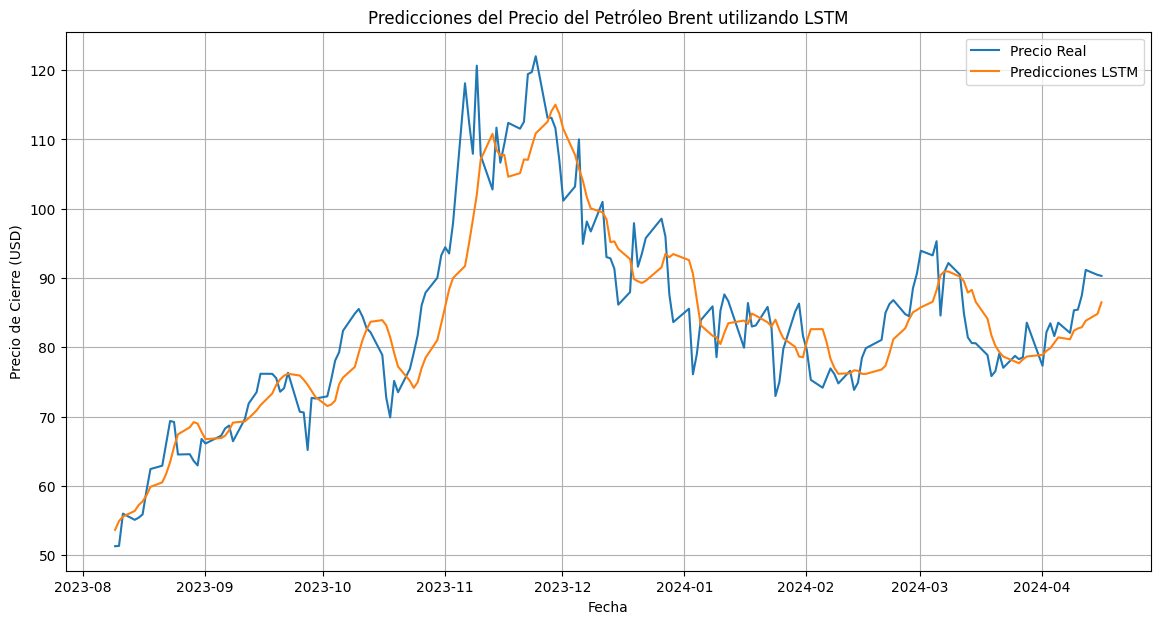

In [3]:
#otra prueba semanal, con mayor mse

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.initializers import GlorotUniform  # Bueno para evitar gradientes que explotan/vanish
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'], utc=True)
data_brent.set_index('Date', inplace=True)

# Resample los datos a frecuencia semanal, tomando el último valor
weekly_data = data_brent['Close'].resample('W-FRI').last().dropna()

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_weekly_data = scaler.fit_transform(weekly_data.values.reshape(-1, 1))

# Creación de secuencias
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        seq_x, seq_y = data[i:(i + seq_length), 0], data[i + seq_length, 0]
        if not np.isnan(seq_x).any() and not np.isnan(seq_y):
            x.append(seq_x)
            y.append(seq_y)
    return np.array(x), np.array(y)

seq_length = 5  # Más corto para datos semanales
x, y = create_sequences(scaled_weekly_data, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape de los datos para que coincidan con el formato de entrada de LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Modelo LSTM con inicializador GlorotUniform
initializer = GlorotUniform()
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1), kernel_initializer=initializer),
    Dropout(0.3),  # Aumentar si es necesario
    LSTM(50, return_sequences=False, kernel_initializer=initializer),
    Dropout(0.3),  # Aumentar si es necesario
    Dense(1, kernel_initializer=initializer)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping para evitar sobreajustes y ahorrar tiempo de entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stop])

# Asegúrate de que no hay NaNs en las predicciones
if np.isnan(history.history['loss']).any() or np.isnan(history.history['val_loss']).any():
    raise ValueError("Se encontraron NaN en la historia de entrenamiento.")

# Predicciones
predictions = model.predict(x_test)
if np.isnan(predictions).any():
    raise ValueError("Se encontraron NaN en las predicciones.")

predictions = scaler.inverse_transform(predictions)

# Calcular las métricas
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
mse = mean_squared_error(y_test_rescaled, predictions)
mae = mean_absolute_error(y_test_rescaled, predictions)
r2 = r2_score(y_test_rescaled, predictions)
rmse = math.sqrt(mse)


print("Error Cuadrático Medio semanal de LSTM:", mse)
print("Error Absoluto Medio semanal de LSTM:", mae)
print("R^2 semanal de LSTM:", r2)
print("Raíz del Error Cuadrático Medio semanal de LSTM:", rmse)


# Gráficos
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Precio Real')
plt.plot(data_brent.index[-len(predictions):], predictions, label='Predicciones LSTM')
plt.title('Predicciones del Precio del Petróleo Brent utilizando LSTM')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()


# busquedas  Hiperparametros grid search y random search 

DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
802 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_p

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
MSE del mejor modelo: 0.0013143456889202416


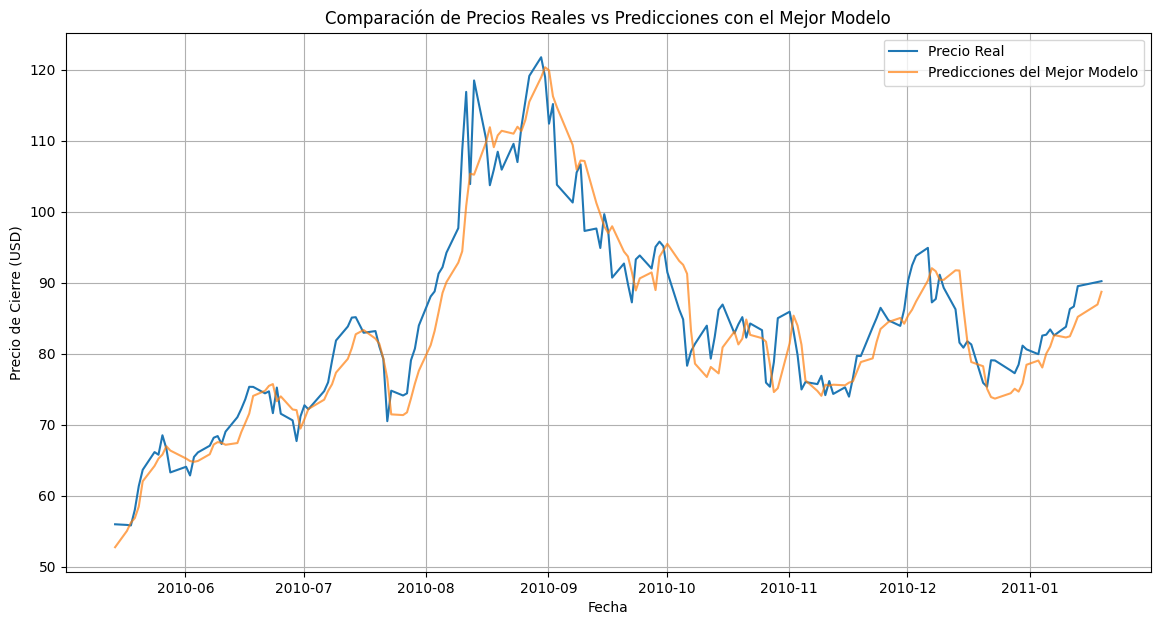

In [8]:
#busqueda del grid seaerch, semanal

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Random Forest
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)
# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Modelo para GridSearchCV
rf_model = RandomForestRegressor()

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajuste del modelo
grid_search.fit(x_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluación del modelo con el conjunto de prueba
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

# Resultados
print("MSE del mejor modelo:", mse)

# Gráfico de la comparación de precios reales vs predicciones con el mejor modelo
y_test_inversed = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inversed = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
plt.figure(figsize=(14, 7))
plt.plot(data_brent.index[train_size:train_size+len(y_pred)], y_test_inversed, label='Precio Real')
plt.plot(data_brent.index[train_size:train_size+len(y_pred)], y_pred_inversed, label='Predicciones del Mejor Modelo', alpha=0.7)
plt.title('Comparación de Precios Reales vs Predicciones con el Mejor Modelo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

## grid seach GBR

In [1]:
#busqueda de grid search semanal

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para Gradient Boosting Regressor
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Instanciar el modelo Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
701 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_p

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


## grid seach de ada boosting 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [2, 4, 6],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Instanciar el modelo base DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Instanciar el modelo AdaBoostRegressor
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores hiperparámetros: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 2, 'learning_rate': 0.01, 'n_estimators': 100}


In [6]:
#busqueda semanal
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos asegurando que la columna 'Date' se analice como fecha
data_brent = pd.read_csv('brent_oil_prices.csv', parse_dates=['Date'])
data_brent.set_index('Date', inplace=True)

# Convertir el índice a DatetimeIndex asegurando que se manejen las zonas horarias
if not isinstance(data_brent.index, pd.DatetimeIndex):
    data_brent.index = pd.to_datetime(data_brent.index, utc=True)  # Uso de utc=True para conversiones tz-aware

# Comprobar que el índice es del tipo correcto
print(data_brent.index)

# Agrupar datos por semana y obtener el precio de cierre promedio de la semana
data_brent_weekly = data_brent['Close'].resample('W').mean()

# Manejo de valores NaN - relleno hacia adelante
data_brent_weekly.fillna(method='ffill', inplace=True)  # Puedes cambiar a 'bfill' si prefieres rellenar hacia atrás

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent_weekly.values.reshape(-1, 1))

# Crear secuencias
def create_features(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 20  # Ajuste de la longitud de secuencia para datos semanales
x, y = create_features(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [2, 4, 6],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}

# Instanciar el modelo base DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Instanciar el modelo AdaBoostRegressor
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")


DatetimeIndex(['2007-07-30 04:00:00+00:00', '2007-07-31 04:00:00+00:00',
               '2007-08-01 04:00:00+00:00', '2007-08-02 04:00:00+00:00',
               '2007-08-03 04:00:00+00:00', '2007-08-06 04:00:00+00:00',
               '2007-08-07 04:00:00+00:00', '2007-08-08 04:00:00+00:00',
               '2007-08-09 04:00:00+00:00', '2007-08-10 04:00:00+00:00',
               ...
               '2024-04-03 04:00:00+00:00', '2024-04-04 04:00:00+00:00',
               '2024-04-05 04:00:00+00:00', '2024-04-08 04:00:00+00:00',
               '2024-04-09 04:00:00+00:00', '2024-04-10 04:00:00+00:00',
               '2024-04-11 04:00:00+00:00', '2024-04-12 04:00:00+00:00',
               '2024-04-15 04:00:00+00:00', '2024-04-16 04:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4149, freq=None)
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores hiperparámetros: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 10, 'learning_rate': 0.01, 'n_estimators': 150}


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Oscar\miniforge3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mejores hiperparámetros: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 6, 'base_estimator__min_samples_split': 30, 'learning_rate': 0.001, 'n_estimators': 50}
Entrenamiento - MAE: 0.008255730577177297, MSE: 0.00013097134855363196, RMSE: 0.011444271429568243, R^2: 0.9971224249067846
Prueba - MAE: 0.012331218082098605, MSE: 0.0003068255583428543, RMSE: 0.017516436804979895, R^2: 0.9725319605816173


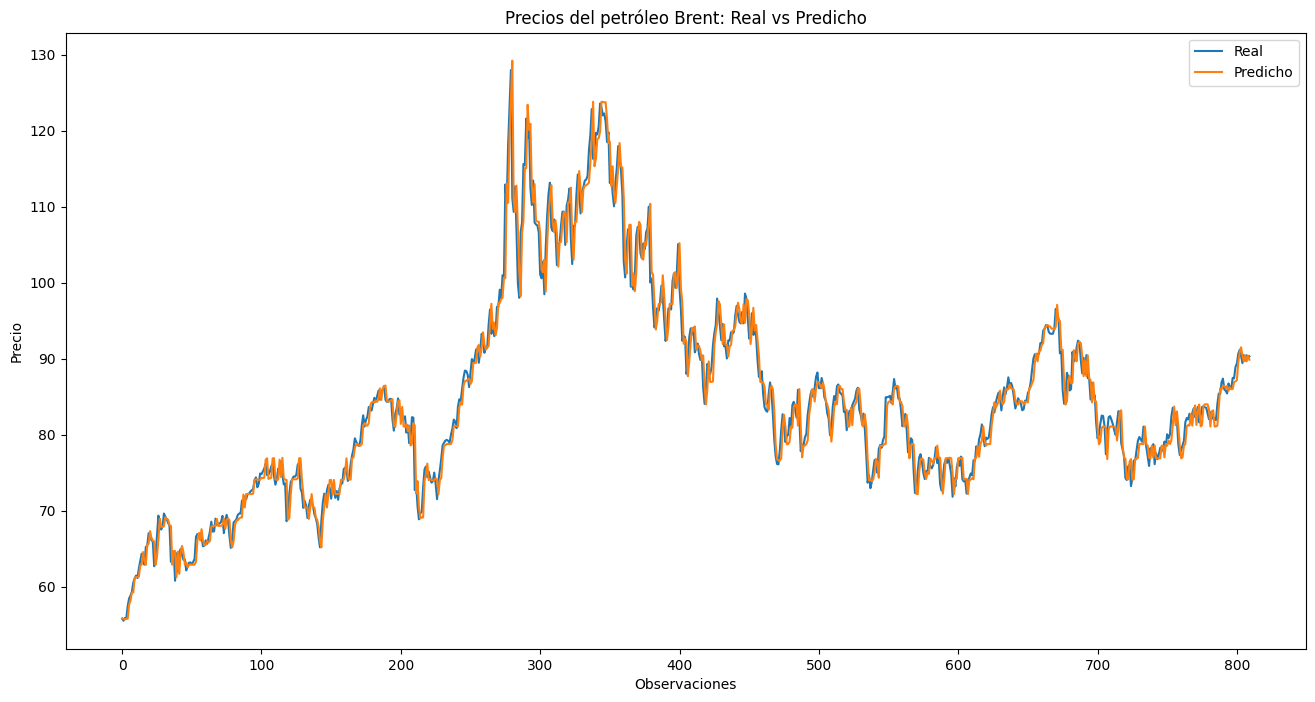

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data_brent = pd.read_csv('brent_oil_prices.csv')
data_brent['Date'] = pd.to_datetime(data_brent['Date'])
data_brent.set_index('Date', inplace=True)

# Preparar los datos para AdaBoost
scaler = MinMaxScaler(feature_range=(0, 1))
data_brent_scaled = scaler.fit_transform(data_brent[['Close']])

# Crear secuencias
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i].flatten())
        ys.append(data[i][0])
    return np.array(xs), np.array(ys)

seq_length = 100
x, y = create_sequences(data_brent_scaled, seq_length)

# División de datos en entrenamiento y prueba
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Definir la rejilla de hiperparámetros con un rango adecuado para evitar sobreajuste
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'base_estimator__max_depth': [3, 4, 6],
    'base_estimator__min_samples_split': [10, 20, 30],
    'base_estimator__min_samples_leaf': [4, 6, 8]
}

# Instanciar el modelo base DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Instanciar el modelo AdaBoostRegressor
ada_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Entrenar el modelo con los mejores hiperparámetros
best_ada_model = grid_search.best_estimator_

# Realizar predicciones con el conjunto de prueba
y_train_pred = best_ada_model.predict(x_train)
y_test_pred = best_ada_model.predict(x_test)

# Calcular las métricas para entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Entrenamiento - MAE: {mae_train}, MSE: {mse_train}, RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Prueba - MAE: {mae_test}, MSE: {mse_test}, RMSE: {rmse_test}, R^2: {r2_test}")

# Desnormalizar las predicciones y los valores reales
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Crear un DataFrame para facilitar el trazado
df = pd.DataFrame({'Real': y_test_inv.flatten(), 'Predicho': y_test_pred_inv.flatten()})

# Trazar los valores reales y predichos
plt.figure(figsize=(16, 8))
plt.plot(df['Real'], label='Real')
plt.plot(df['Predicho'], label='Predicho')
plt.title('Precios del petróleo Brent: Real vs Predicho')
plt.xlabel('Observaciones')
plt.ylabel('Precio')
plt.legend()
plt.show()
